# Análisis Exploratorio de Datos (EDA) - Proyecto Ejecutado

Este notebook contiene una ejecución paso a paso del análisis exploratorio de datos implementado en el proyecto, utilizando los módulos desarrollados en la carpeta `src/`. Cada sección incluye comentarios detallados que explican el proceso y los resultados obtenidos.

## Contenido:
1. Configuración inicial
2. Carga de datos
3. Resumen y calidad de columnas
4. Estadísticas descriptivas
5. Visualización de distribuciones
6. Análisis de la variable objetivo
7. EDA completo en un solo paso

## 1. Configuración inicial

Primero, importamos las bibliotecas necesarias y configuramos el entorno para el análisis exploratorio.

In [1]:
# Importamos las librerías necesarias
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from typing import List, Dict, Union, Optional

# Aseguramos que podemos importar los módulos del proyecto
# Si estamos en el directorio notebooks, necesitamos añadir el directorio raíz al path
sys.path.append('..')

# Importamos las funciones de nuestro proyecto
from src.cargar_csv import cargar_csv
from src.resumen_columnas import resumen_columnas, ordenar_resumen, obtener_top_faltantes
from src.eda import (
    mostrar_info_basica,
    plot_distrib_objetivo,
    descriptivos_numericos,
    top_categorias,
    graficar_histogramas as graficar_histogramas_original,
    graficar_boxplots as graficar_boxplots_original,
    decision_metrica,
    eda_minimo,
)

# Wrapper para graficar_histogramas con rutas correctas
def graficar_histogramas(df: pd.DataFrame, max_cols: int = 12, show: bool = False) -> list[str]:
    """Wrapper para graficar_histogramas que usa rutas relativas al notebook"""
    # Filtrar columnas numéricas
    num_cols = df.select_dtypes(include=["number"]).columns.tolist()
    
    if not num_cols:
        print("⚠️ No se encontraron columnas numéricas para generar histogramas")
        return []
    
    # Si hay demasiadas columnas, advertir y limitar
    if len(num_cols) > max_cols:
        print(f"⚠️ Limitando a {max_cols} histogramas (de {len(num_cols)} columnas numéricas)")
        num_cols = num_cols[:max_cols]
    
    rutas_guardado = []
    
    # Generar histograma para cada columna
    for col in num_cols:
        plt.figure(figsize=(10, 6))
        ax = plt.subplot()
        
        # Generar el histograma
        df[col].hist(ax=ax, bins=20, edgecolor="black", alpha=0.7)
        
        # Configurar el gráfico
        ax.set_title(f"Distribución de {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Frecuencia")
        plt.grid(axis="y", alpha=0.75)
        plt.tight_layout()
        
        # Guardar el archivo con ruta relativa al notebook
        ruta = f"../outputs/figures/hist_{col}.png"
        plt.savefig(ruta, dpi=150)
        rutas_guardado.append(ruta)
        
        if show:
            plt.show()
        else:
            plt.close()
    
    print(f"[OK] {len(rutas_guardado)} histogramas guardados en ../outputs/figures/")
    return rutas_guardado

# Wrapper para graficar_boxplots con rutas correctas
def graficar_boxplots(df: pd.DataFrame, max_cols: int = 12, show: bool = False) -> list[str]:
    """Wrapper para graficar_boxplots que usa rutas relativas al notebook"""
    # Filtrar columnas numéricas
    num_cols = df.select_dtypes(include=["number"]).columns.tolist()
    
    if not num_cols:
        print("⚠️ No se encontraron columnas numéricas para generar boxplots")
        return []
    
    # Si hay demasiadas columnas, advertir y limitar
    if len(num_cols) > max_cols:
        print(f"⚠️ Limitando a {max_cols} boxplots (de {len(num_cols)} columnas numéricas)")
        num_cols = num_cols[:max_cols]
    
    rutas_guardado = []
    
    # Generar boxplot para cada columna
    for col in num_cols:
        plt.figure(figsize=(10, 4))
        ax = plt.subplot()
        
        # Generar el boxplot horizontal
        df[[col]].boxplot(ax=ax, vert=False)
        
        # Configurar el gráfico
        ax.set_title(f"Boxplot de {col}")
        ax.set_xlabel(col)
        ax.set_yticks([])  # Ocultar etiquetas del eje Y
        plt.tight_layout()
        
        # Guardar el archivo con ruta relativa al notebook
        ruta = f"../outputs/figures/box_{col}.png"
        plt.savefig(ruta, dpi=150)
        rutas_guardado.append(ruta)
        
        if show:
            plt.show()
        else:
            plt.close()
    
    print(f"[OK] {len(rutas_guardado)} boxplots guardados en ../outputs/figures/")
    return rutas_guardado

# Configuración de visualización
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

# Aseguramos que existan los directorios para los outputs
Path("../outputs").mkdir(exist_ok=True)
Path("../outputs/figures").mkdir(parents=True, exist_ok=True)
Path("../outputs/resumen").mkdir(parents=True, exist_ok=True)

## 2. Carga de datos

Utilizamos la función `cargar_csv` que hemos desarrollado para cargar el dataset de manera robusta, intentando diferentes encodings para asegurar que se lean correctamente los datos.

In [14]:
# Cargamos el dataset principal utilizando nuestra función robusta
# Esta función intenta diferentes encodings (utf-8, latin-1) y devuelve tanto el DataFrame como metadata
ruta_csv = "../Generative AI Tools - Platforms 2025.csv"
df, metadata = cargar_csv(ruta_csv, sep=",")

# Mostramos la información básica del dataset
print("\nMetadata de la carga:")
for key, value in metadata.items():
    if key != "tipos_columnas" and key != "columnas_lista":  # Evitamos imprimir listas muy largas
        print(f"- {key}: {value}")
        
# Mostramos los primeros registros para exploración inicial
df.head()

[OK] Cargado con encoding='utf-8', filas=113, columnas=22

Metadata de la carga:
- ruta_absoluta: C:\Users\Cerpa\Documents\GitHub\EDA\Generative AI Tools - Platforms 2025.csv
- nombre_archivo: Generative AI Tools - Platforms 2025.csv
- encoding_usado: utf-8
- separador: ,
- filas: 113
- columnas: 22


,tool_name,company,category_canonical,modality_canonical,open_source,api_available,api_status,website,source_domain,release_year,...,mod_image,mod_video,mod_audio,mod_code,mod_design,mod_infra,mod_productivity,mod_safety,mod_multimodal,modality_count
0,ChatGPT,OpenAI,LLMs & Chat Assistants,multimodal,0,1,api,https://chatgpt.com,chatgpt.com,2022,...,0,0,0,0,0,0,0,0,1,0
1,Claude,Anthropic,LLMs & Chat Assistants,multimodal,0,1,api,https://claude.ai,claude.ai,2023,...,0,0,0,0,0,0,0,0,1,0
2,Gemini,Google,LLMs & Chat Assistants,multimodal,0,1,api,https://gemini.google.com,gemini.google.com,2023,...,0,0,0,0,0,0,0,0,1,0
3,Midjourney,Midjourney,Image Gen & Editing,image,0,0,unavailable,https://www.midjourney.com,midjourney.com,2022,...,1,0,0,0,0,0,0,0,0,1
4,Stable Diffusion,Stability AI,Image Gen & Editing,image,1,1,api,https://stability.ai/stable-image,stability.ai,2022,...,1,0,0,0,0,0,0,0,0,1


## 3. Resumen y calidad de columnas

Utilizamos la función `resumen_columnas` para obtener un análisis detallado de la calidad de datos en cada columna del dataset.

In [15]:
# Generamos un resumen de calidad por columna
# La función analiza: tipo de datos, valores faltantes, cardinalidad, etc.
resumen_df = resumen_columnas(df)

# Ordenamos el resumen para priorizar problemas de calidad
# Las columnas con más valores faltantes aparecerán primero
resumen_ordenado = ordenar_resumen(resumen_df)

# Mostramos el resumen completo
resumen_ordenado

,col,dtype,n_missing,pct_missing,n_unique,maybe_binary_text
4,open_source,int64,0,0.0,2,False
5,api_available,int64,0,0.0,2,False
6,api_status,object,0,0.0,2,True
11,mod_text,int64,0,0.0,2,False
12,mod_image,int64,0,0.0,2,False
13,mod_video,int64,0,0.0,2,False
14,mod_audio,int64,0,0.0,2,False
15,mod_code,int64,0,0.0,2,False
16,mod_design,int64,0,0.0,2,False
17,mod_infra,int64,0,0.0,2,False


In [16]:
# Identificamos las columnas con más valores faltantes
# Esto nos ayuda a detectar posibles problemas de calidad de datos
columnas_con_faltantes = obtener_top_faltantes(resumen_df, top=5)
print("Top 5 columnas con más valores faltantes:")
for idx, row in columnas_con_faltantes.iterrows():
    print(f"- {idx}: {row['pct_missing']:.2f}% valores faltantes")

# Guardamos el resumen para referencia futura
ruta_resumen = "../outputs/resumen/resumen_columnas.csv"
resumen_ordenado.to_csv(ruta_resumen, index=True)
print(f"\nResumen guardado en: {ruta_resumen}")

Top 5 columnas con más valores faltantes:
- 0: 0.00% valores faltantes
- 1: 0.00% valores faltantes
- 2: 0.00% valores faltantes
- 3: 0.00% valores faltantes
- 4: 0.00% valores faltantes

Resumen guardado en: ../outputs/resumen/resumen_columnas.csv


## 4. Estadísticas descriptivas

Analizamos las estadísticas descriptivas de las variables numéricas para comprender mejor su distribución y características.

In [17]:
# Mostramos información básica del dataset
mostrar_info_basica(df)

# Calculamos estadísticas descriptivas para variables numéricas
# Esto incluye: media, desviación estándar, mínimo, máximo, cuartiles, etc.
desc_df = descriptivos_numericos(df)
print("\n=== Estadísticas descriptivas de variables numéricas ===\n")
desc_df


=== Vista rápida del dataset ===
Filas: 113, Columnas: 22

Columnas y tipos:
tool_name              object
company                object
category_canonical     object
modality_canonical     object
open_source             int64
api_available           int64
api_status             object
website                object
source_domain          object
release_year            int64
years_since_release     int64
mod_text                int64
mod_image               int64
mod_video               int64
mod_audio               int64
mod_code                int64
mod_design              int64
mod_infra               int64
mod_productivity        int64
mod_safety              int64
mod_multimodal          int64
modality_count          int64
dtype: object

Primeras 5 filas:
          tool_name       company      category_canonical modality_canonical  \
0           ChatGPT        OpenAI  LLMs & Chat Assistants         multimodal   
1            Claude     Anthropic  LLMs & Chat Assistants         mul

,count,mean,std,min,25%,50%,75%,max,cv,iqr,skewness,kurtosis
open_source,113.0,0.3717,0.4854,0.0,0.0,0.0,1.0,1.0,1.3060,1.0,0.5382,-1.7414
api_available,113.0,0.9469,0.2252,0.0,1.0,1.0,1.0,1.0,0.2379,0.0,-4.0400,14.5792
release_year,113.0,2022.2035,2.0838,2013.0,2022.0,2023.0,2023.0,2025.0,0.0010,1.0,-1.9699,4.8012
years_since_release,113.0,2.7965,2.0838,0.0,2.0,2.0,3.0,12.0,0.7451,1.0,1.9699,4.8012
mod_text,113.0,0.0265,0.1615,0.0,0.0,0.0,0.0,1.0,6.0823,0.0,5.9697,34.2431
mod_image,113.0,0.1239,0.3309,0.0,0.0,0.0,0.0,1.0,2.6711,0.0,2.3140,3.4147
mod_video,113.0,0.0708,0.2576,0.0,0.0,0.0,0.0,1.0,3.6390,0.0,3.3920,9.6767
mod_audio,113.0,0.1239,0.3309,0.0,0.0,0.0,0.0,1.0,2.6711,0.0,2.3140,3.4147
mod_code,113.0,0.1681,0.3757,0.0,0.0,0.0,0.0,1.0,2.2342,0.0,1.7986,1.2571
mod_design,113.0,0.0265,0.1615,0.0,0.0,0.0,0.0,1.0,6.0823,0.0,5.9697,34.2431


## 5. Visualización de distribuciones

Generamos visualizaciones para entender mejor la distribución de las variables en el dataset.


=== Top categorías para 'category_canonical' ===
category_canonical
LLMs & Chat Assistants     32
Other                      27
Video Gen & Editing        13
Image Gen & Editing        12
Audio/Music/TTS             6
Search & RAG                6
Safety & Guardrails         5
Design & UI                 4
Infra & Inference           3
Evaluation & Benchmarks     2
Name: count, dtype: int64
Gráfico guardado en: ../outputs/figures/category_canonical_distribucion.png
Gráfico guardado en: ../outputs/figures/category_canonical_distribucion.png


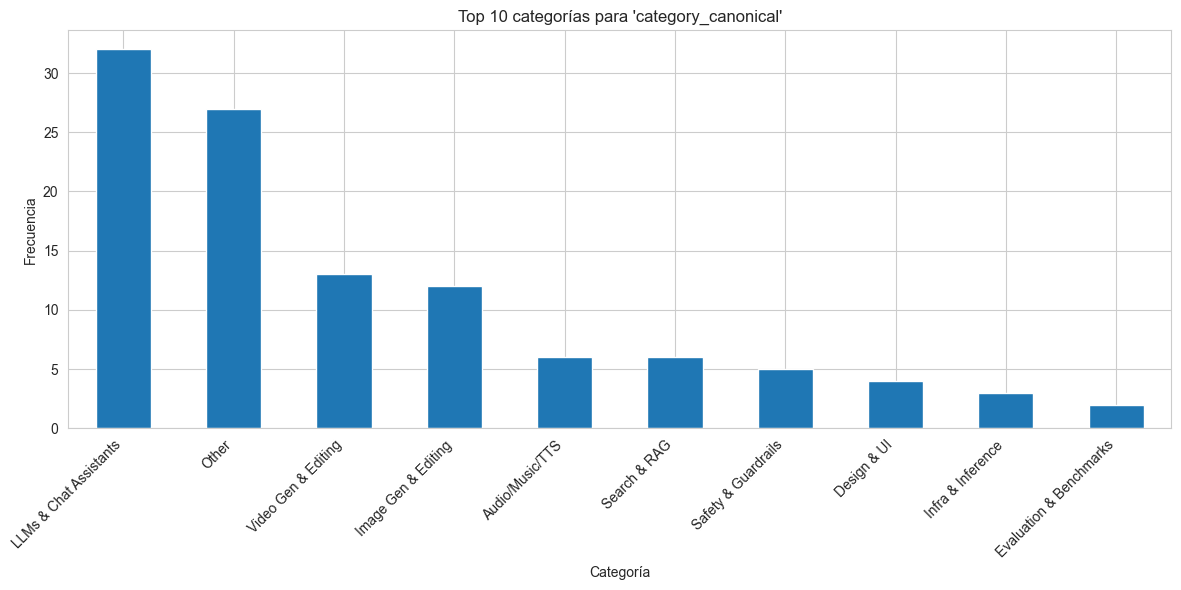


=== Top categorías para 'modality_canonical' ===
modality_canonical
multimodal      20
code            19
infra           18
image           14
audio           14
productivity    10
video            8
safety           4
design           3
text             3
Name: count, dtype: int64
Gráfico guardado en: ../outputs/figures/modality_canonical_distribucion.png
Gráfico guardado en: ../outputs/figures/modality_canonical_distribucion.png


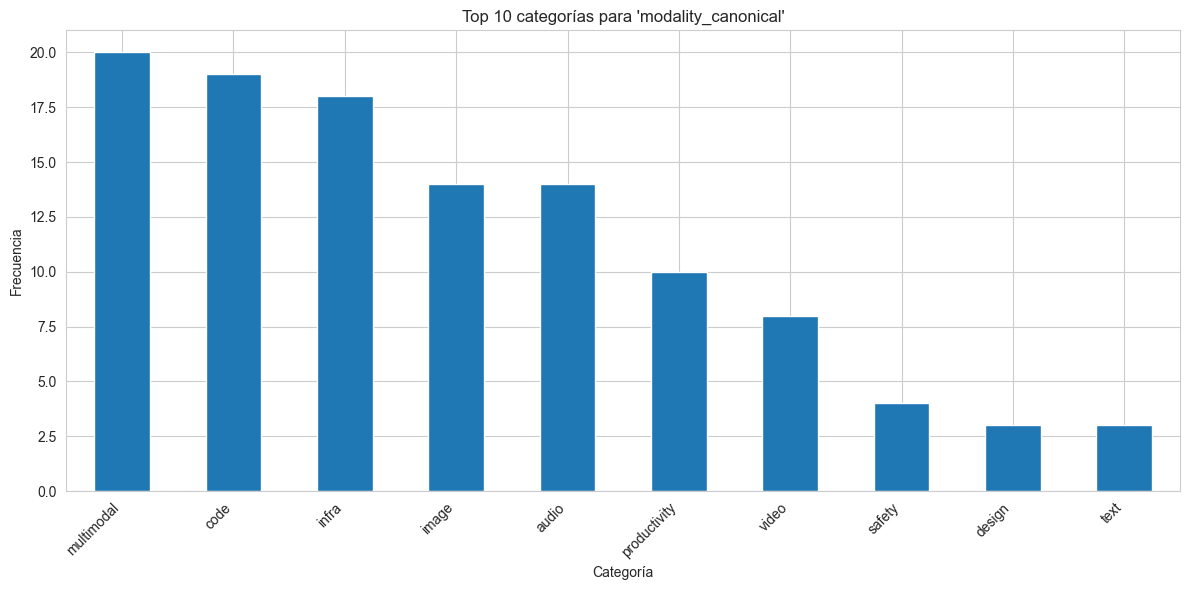


=== Top categorías para 'company' ===
company
OpenAI                 9
Meta                   5
Mistral AI             4
Hugging Face           4
Anthropic              3
Community              3
Adobe                  3
Google Cloud           2
Google                 2
Amazon Web Services    2
Name: count, dtype: int64
Gráfico guardado en: ../outputs/figures/company_distribucion.png
Gráfico guardado en: ../outputs/figures/company_distribucion.png


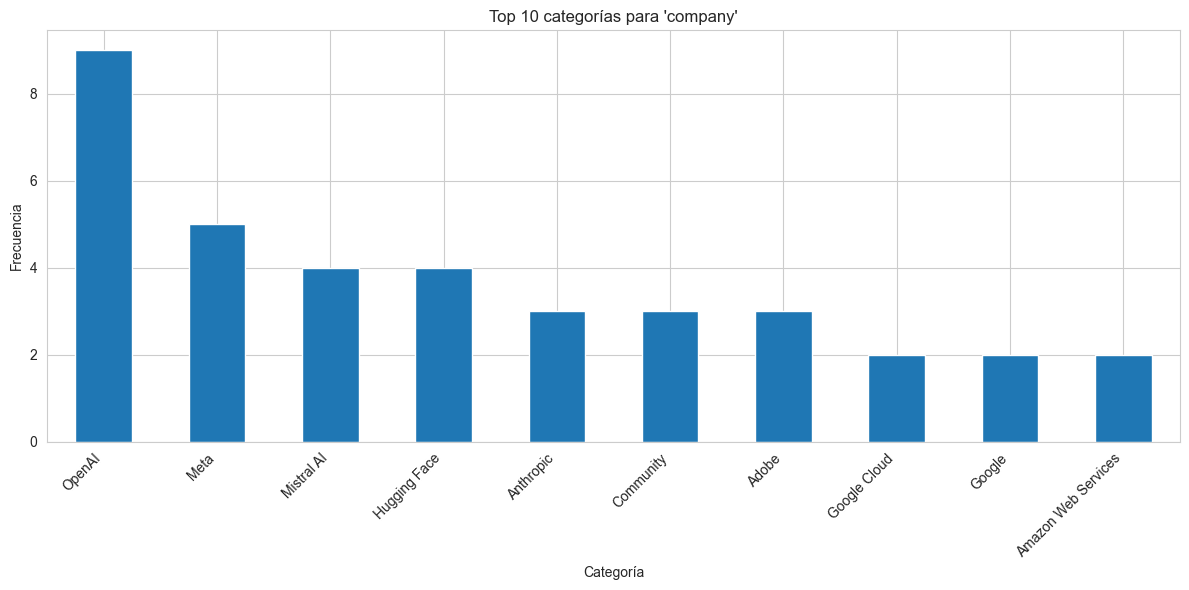

In [18]:
# Analizamos las principales categorías en columnas categóricas
# Definimos las columnas que queremos analizar
columnas_categoricas = ["category_canonical", "modality_canonical", "company"]

# Para cada columna categórica, mostramos las categorías más frecuentes
for col in columnas_categoricas:
    if col in df.columns:
        print(f"\n=== Top categorías para '{col}' ===")
        # Obtenemos el resultado de la función
        resultados = top_categorias(df, [col], k=10)
        
        # Mostramos los resultados
        if col in resultados:
            print(resultados[col])
            
            # Creamos una visualización
            plt.figure(figsize=(12, 6))
            resultados[col].plot(kind='bar')
            plt.title(f"Top 10 categorías para '{col}'")
            plt.xlabel('Categoría')
            plt.ylabel('Frecuencia')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            
            # Guardamos la figura
            savepath = f"../outputs/figures/{col}_distribucion.png"
            plt.savefig(savepath)
            print(f"Gráfico guardado en: {savepath}")
            plt.show()


=== Histogramas de variables numéricas ===
⚠️ Limitando a 12 histogramas (de 15 columnas numéricas)


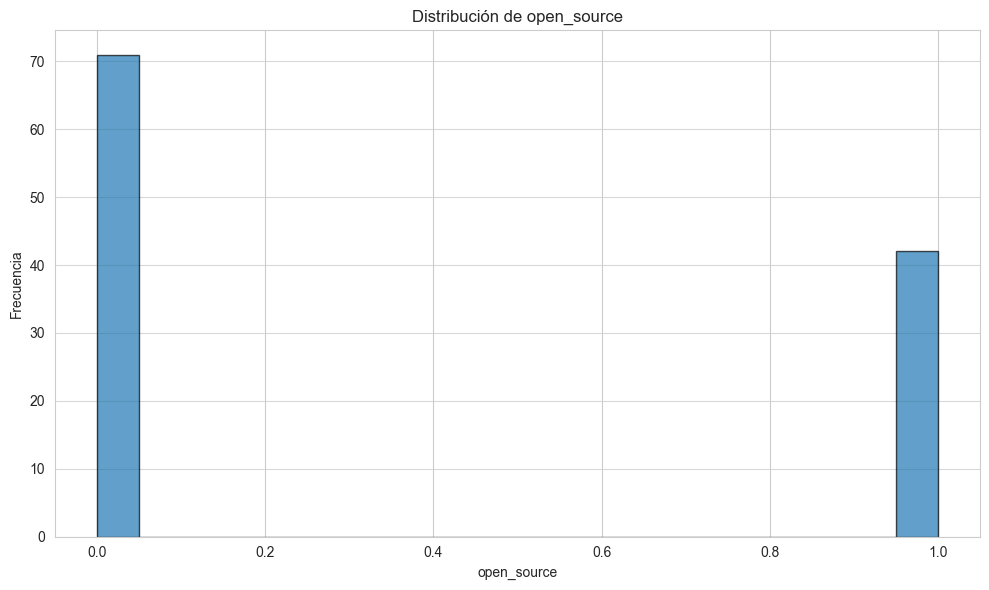

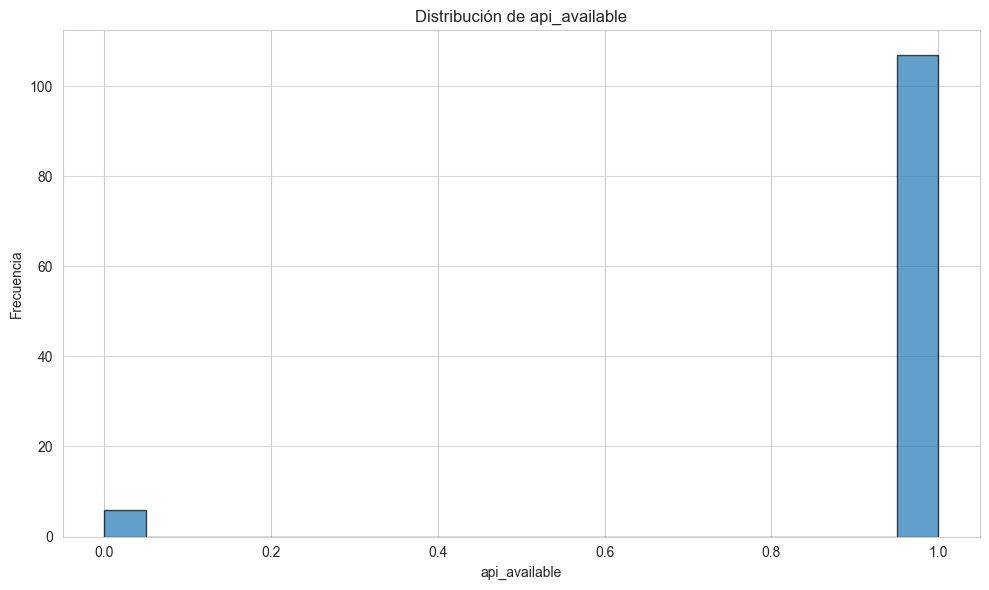

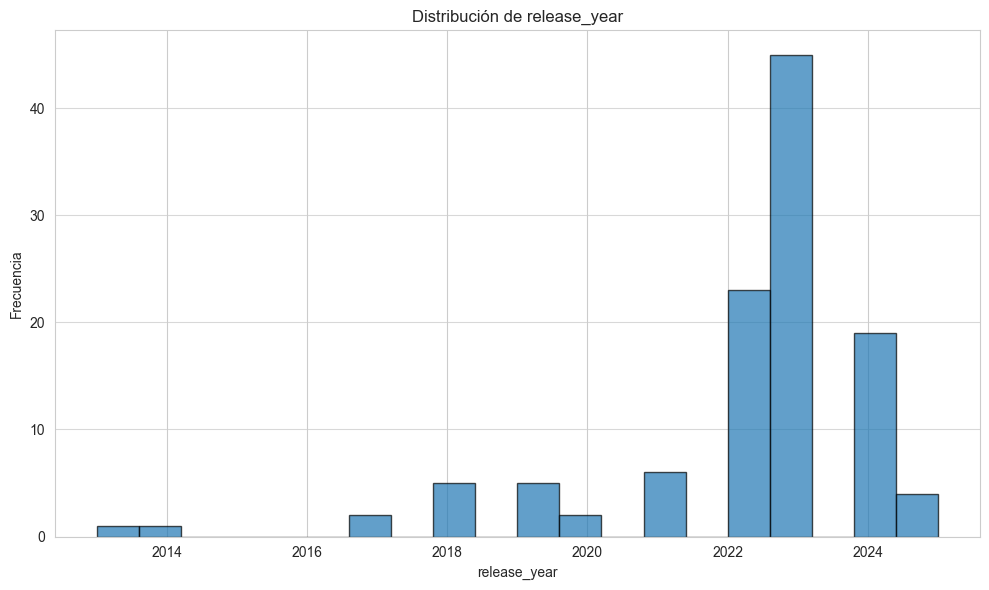

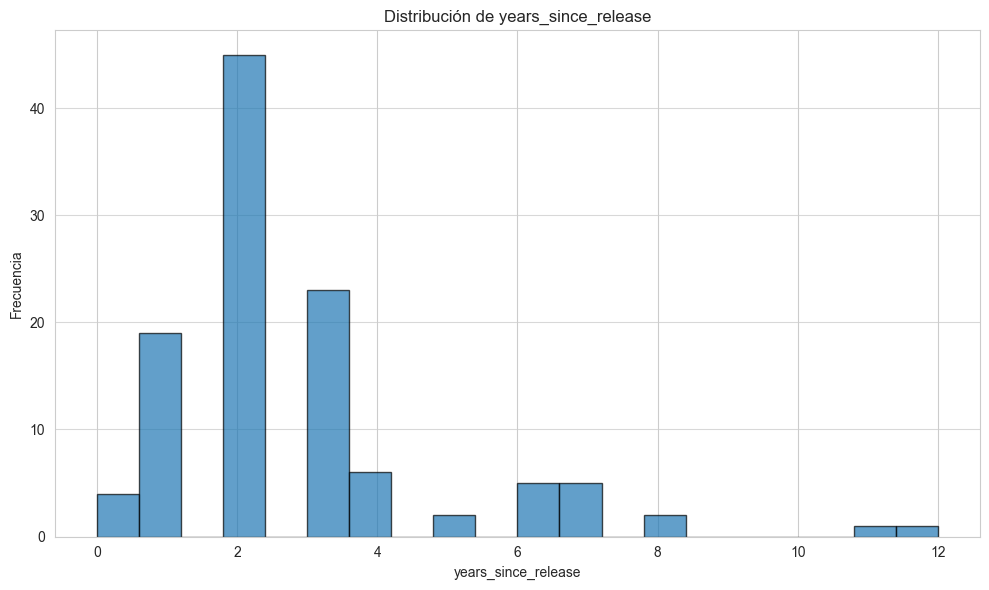

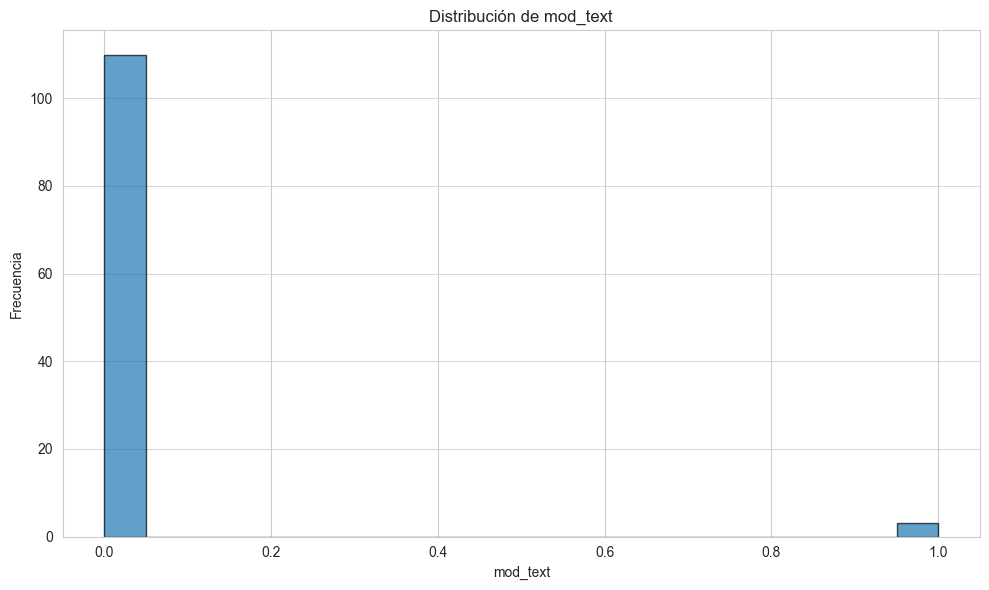

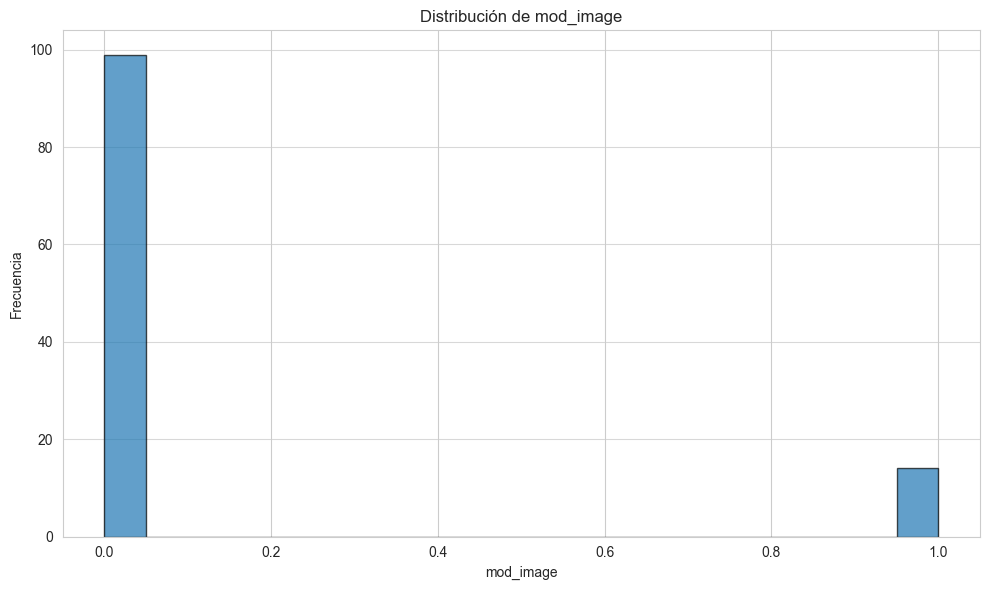

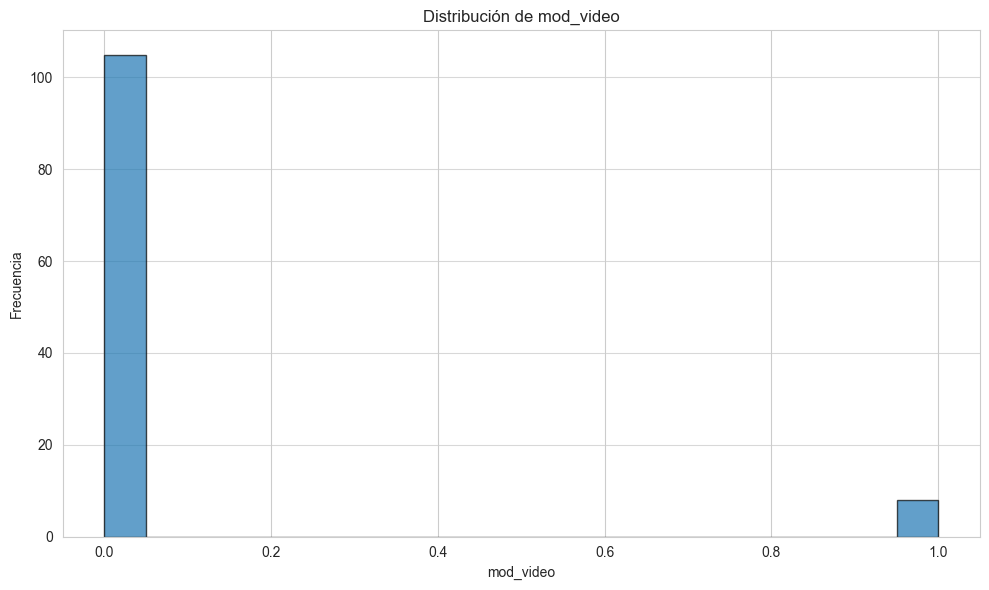

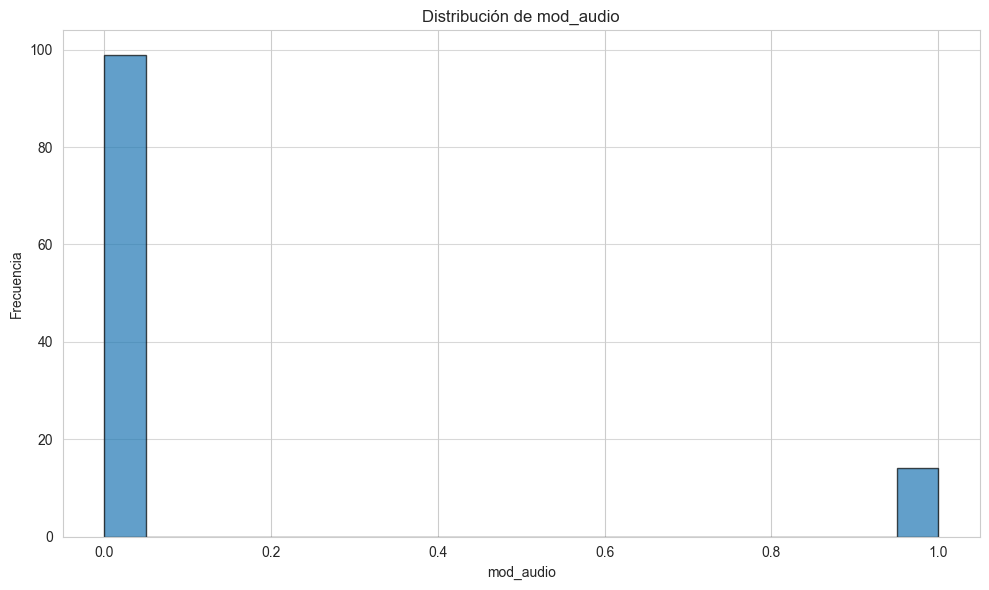

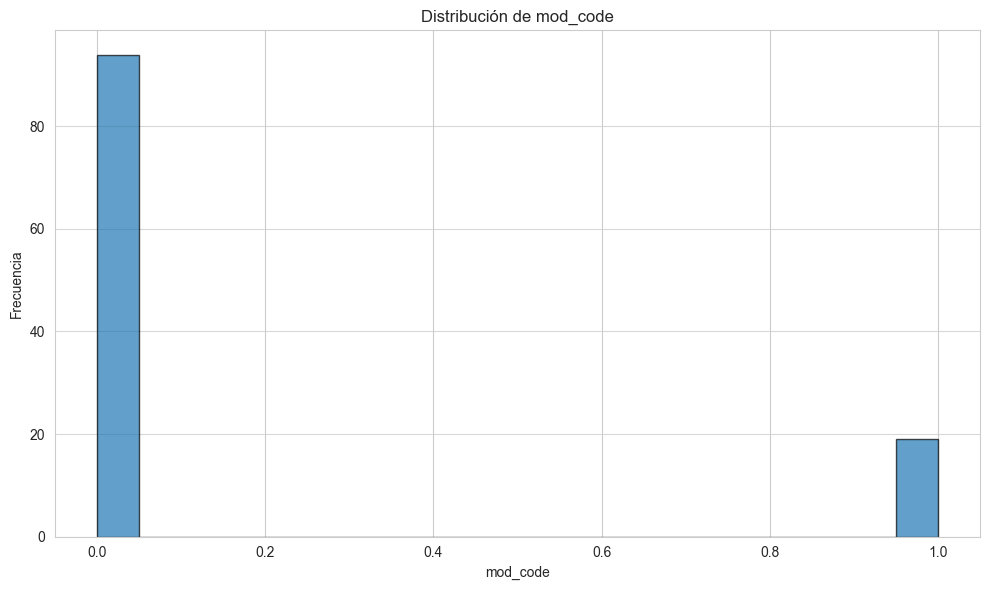

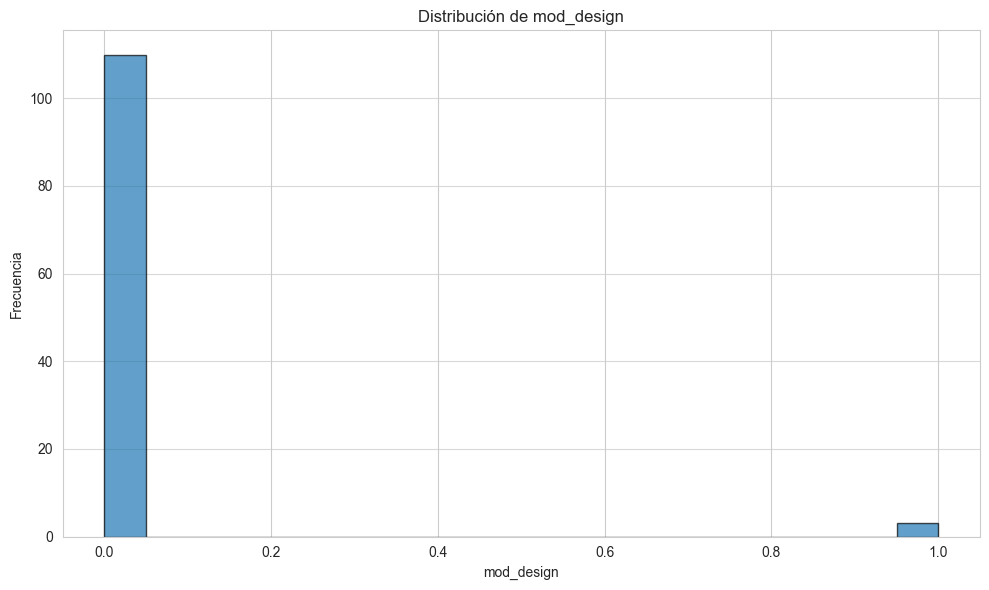

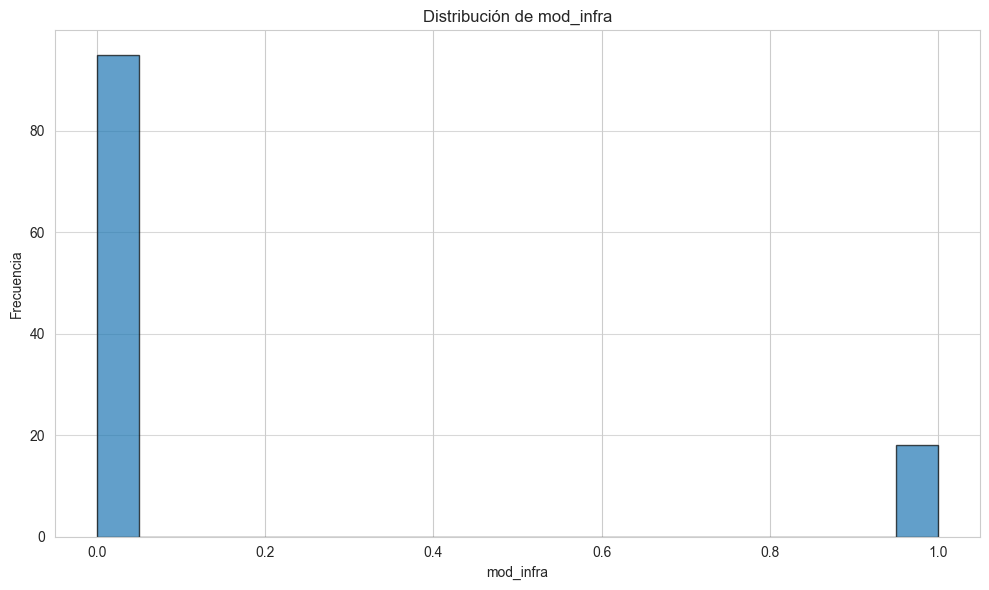

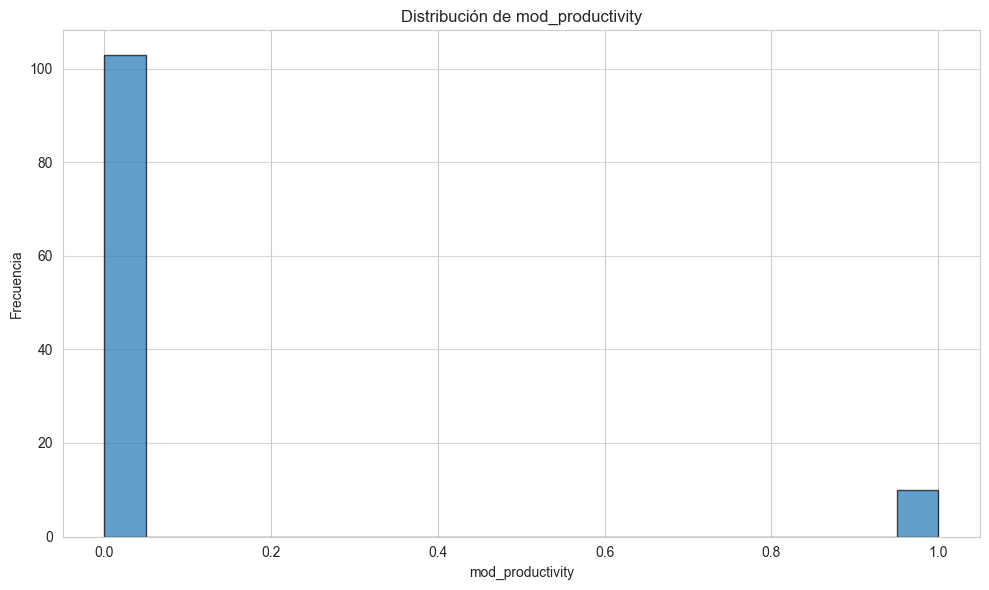

[OK] 12 histogramas guardados en ../outputs/figures/
Histogramas guardados en: ['../outputs/figures/hist_open_source.png', '../outputs/figures/hist_api_available.png', '../outputs/figures/hist_release_year.png', '../outputs/figures/hist_years_since_release.png', '../outputs/figures/hist_mod_text.png', '../outputs/figures/hist_mod_image.png', '../outputs/figures/hist_mod_video.png', '../outputs/figures/hist_mod_audio.png', '../outputs/figures/hist_mod_code.png', '../outputs/figures/hist_mod_design.png', '../outputs/figures/hist_mod_infra.png', '../outputs/figures/hist_mod_productivity.png']


In [21]:
# Generamos histogramas para variables numéricas
# Detectamos automáticamente las columnas numéricas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if columnas_numericas:
    print("\n=== Histogramas de variables numéricas ===")
    # La función graficar_histogramas automáticamente determina las columnas numéricas
    rutas_histogramas = graficar_histogramas(df, show=True)
    print(f"Histogramas guardados en: {rutas_histogramas}")


=== Boxplots de variables numéricas ===
⚠️ Limitando a 12 boxplots (de 15 columnas numéricas)


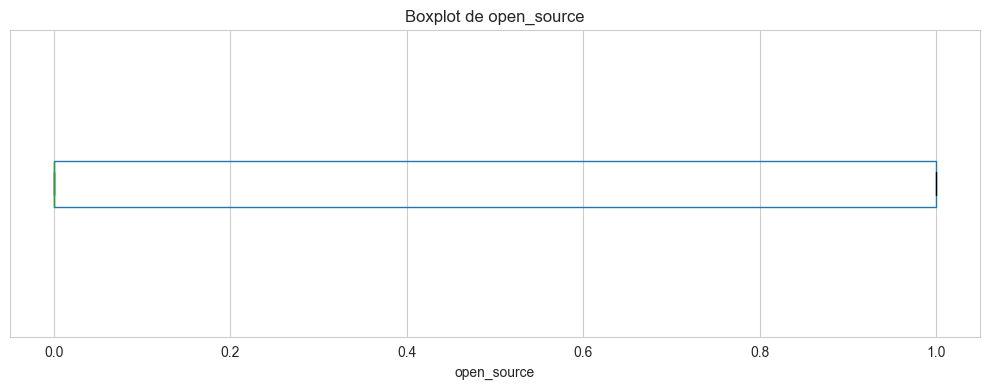

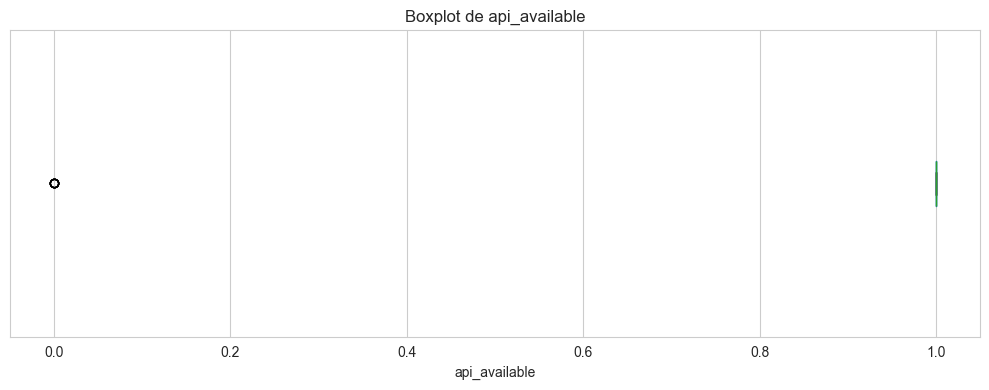

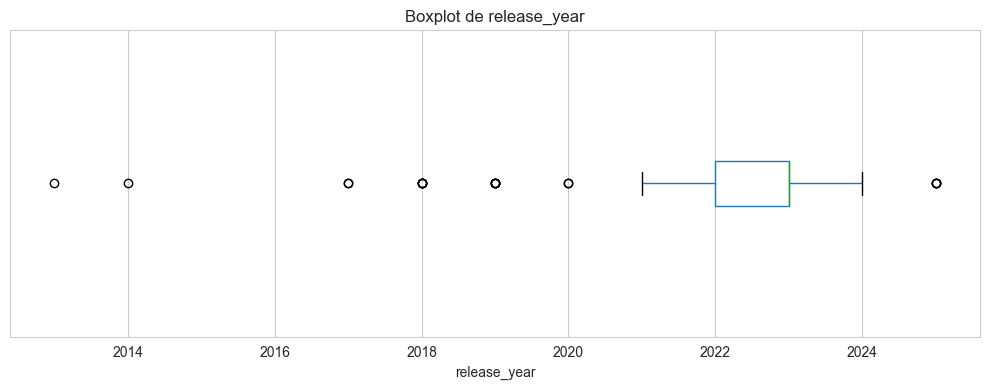

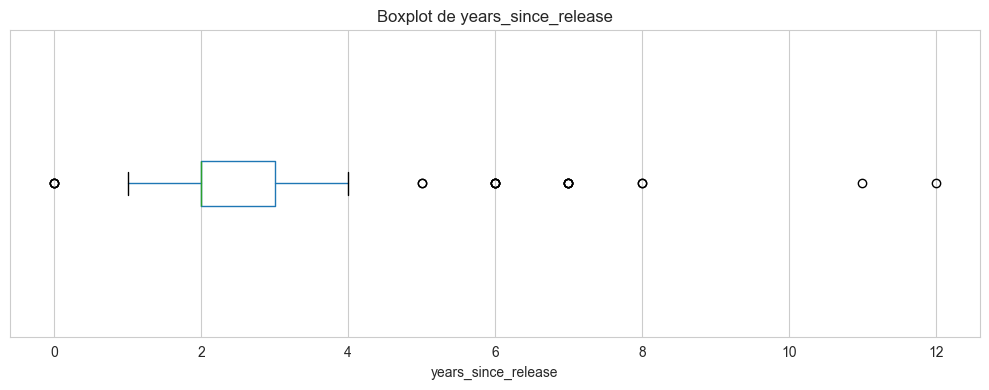

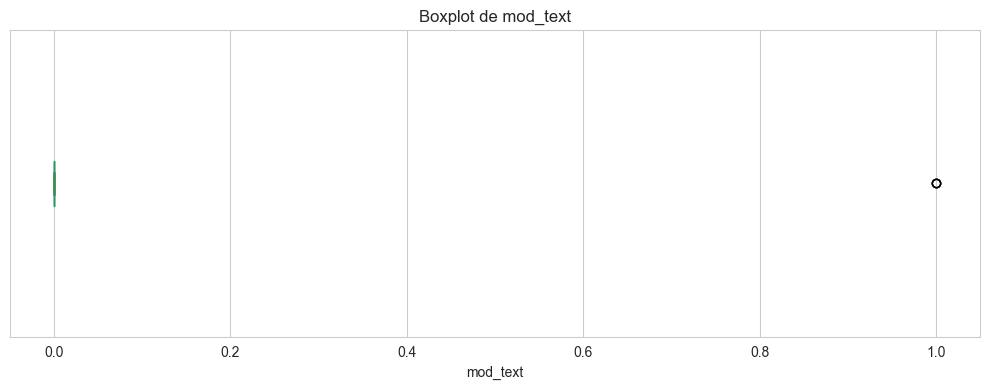

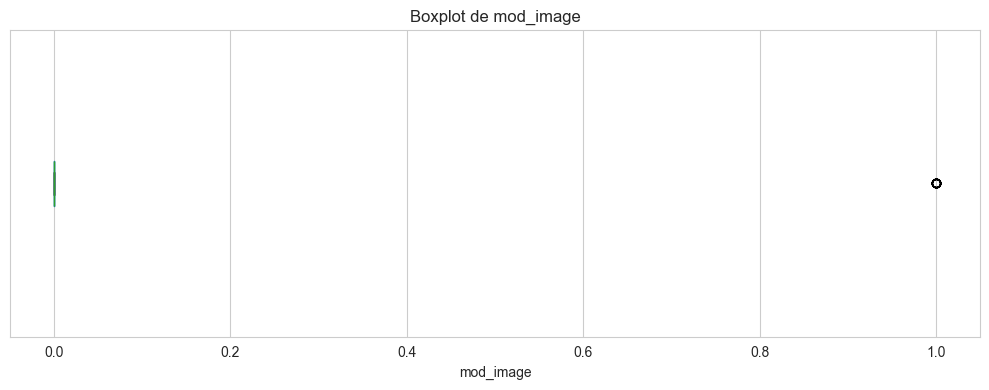

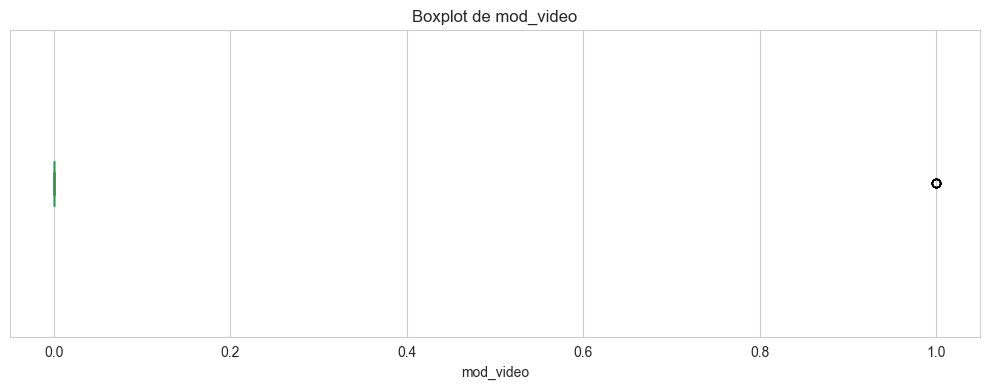

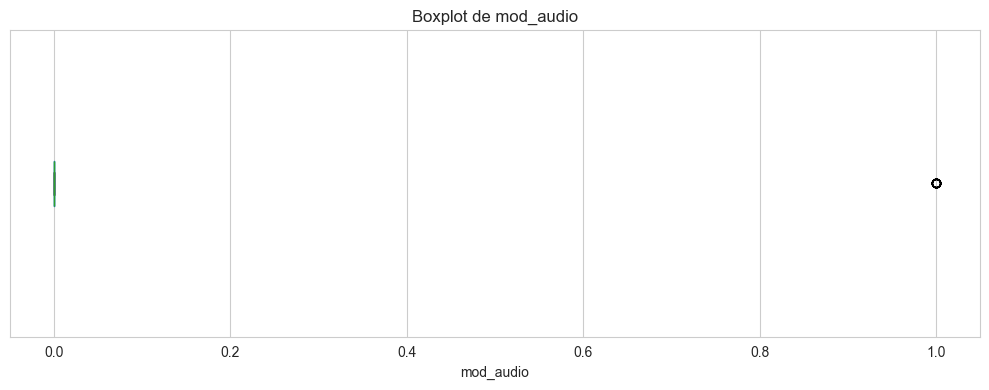

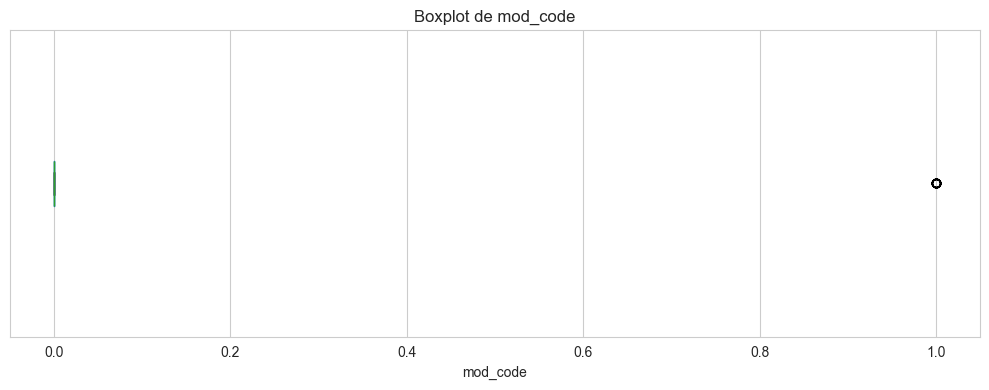

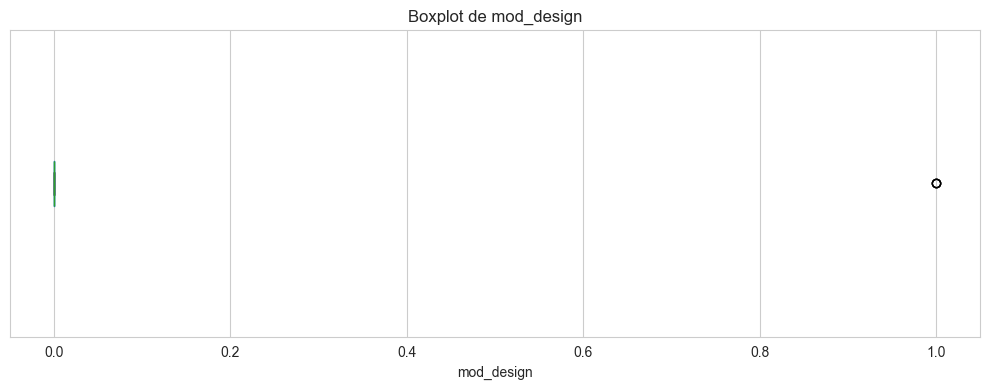

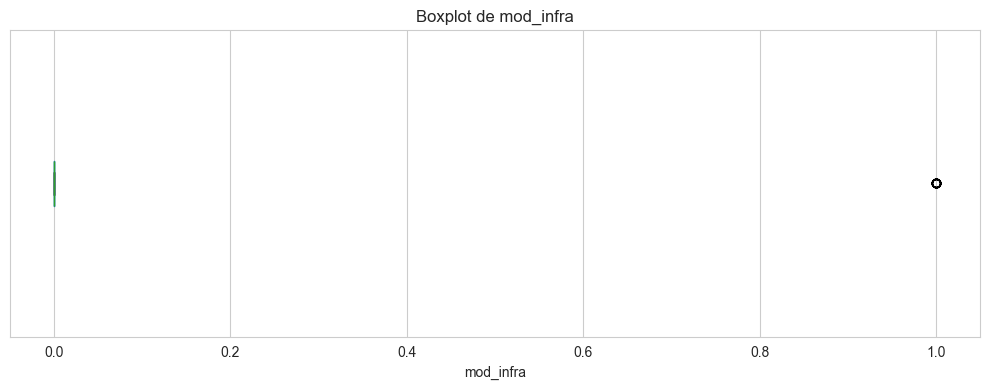

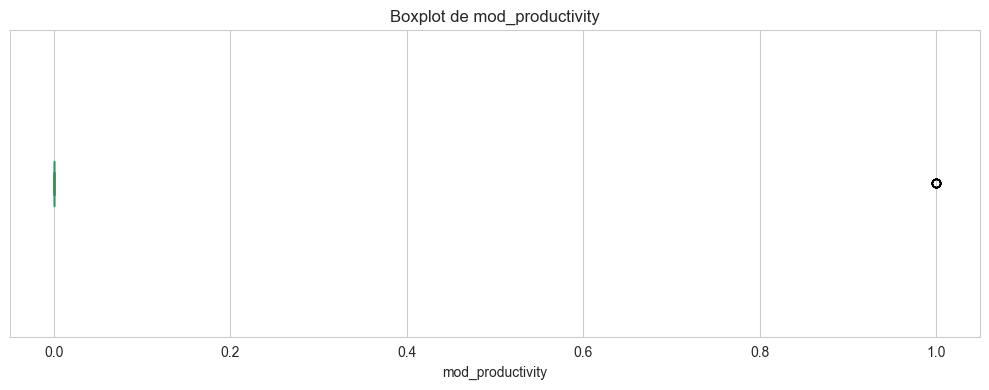

[OK] 12 boxplots guardados en ../outputs/figures/
Boxplots guardados en: ['../outputs/figures/box_open_source.png', '../outputs/figures/box_api_available.png', '../outputs/figures/box_release_year.png', '../outputs/figures/box_years_since_release.png', '../outputs/figures/box_mod_text.png', '../outputs/figures/box_mod_image.png', '../outputs/figures/box_mod_video.png', '../outputs/figures/box_mod_audio.png', '../outputs/figures/box_mod_code.png', '../outputs/figures/box_mod_design.png', '../outputs/figures/box_mod_infra.png', '../outputs/figures/box_mod_productivity.png']


In [23]:
# Generamos boxplots para variables numéricas
# Ayudan a identificar outliers y la distribución
if columnas_numericas:
    print("\n=== Boxplots de variables numéricas ===")
    # La función graficar_boxplots automáticamente determina las columnas numéricas
    rutas_boxplots = graficar_boxplots(df, show=True)
    print(f"Boxplots guardados en: {rutas_boxplots}")

## 6. Análisis de la variable objetivo

Analizamos una variable objetivo específica para entender su distribución y posible desbalance de clases.


=== Distribución de la variable objetivo ===
Conteo por clase:
 company
OpenAI              9
Meta                5
Mistral AI          4
Hugging Face        4
Anthropic           3
                   ..
LM Studio           1
Silero              1
Papers with Code    1
Kaggle              1
OpenHands           1
Name: count, Length: 83, dtype: int64
Proporción por clase:
 company
OpenAI              0.0796
Meta                0.0442
Mistral AI          0.0354
Hugging Face        0.0354
Anthropic           0.0265
                     ...  
LM Studio           0.0088
Silero              0.0088
Papers with Code    0.0088
Kaggle              0.0088
OpenHands           0.0088
Name: count, Length: 83, dtype: float64
Imbalance ratio (mayor/menor): 9.00
[OK] Gráfico guardado en: ../outputs/figures/company_distribucion.png
[OK] Gráfico guardado en: ../outputs/figures/company_distribucion.png


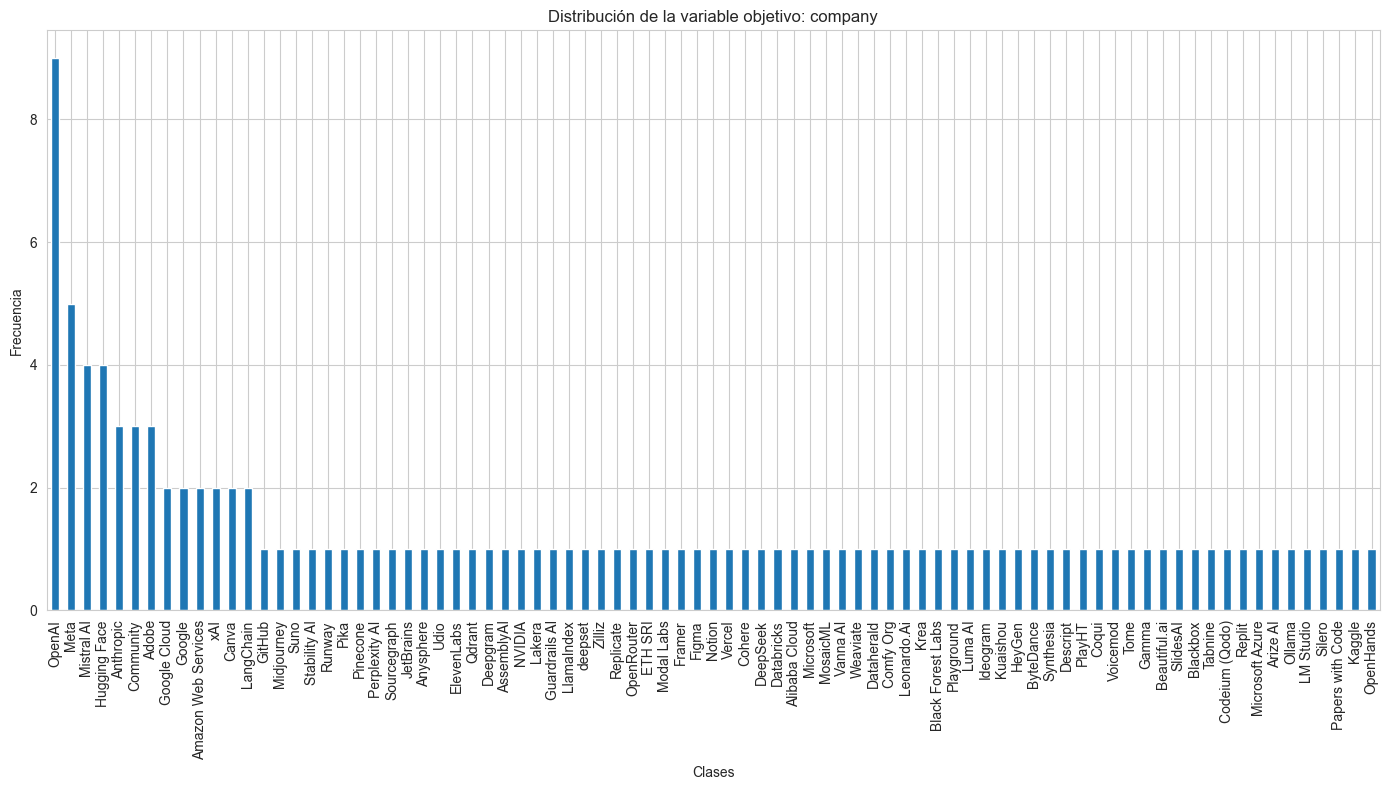

⚠️ Desbalance: usa 'stratify' en el split; reporta F1/AUC; evalúa 'class_weight' o re-muestreo.
Gráfico guardado en: ../outputs/figures/company_distribucion.png

=== Recomendación de métrica de evaluación ===


In [24]:
# Definimos la variable objetivo para nuestro análisis
variable_objetivo = "company"

# Analizamos la distribución de la variable objetivo
# Calculamos también el "imbalance ratio" (proporción entre clase mayoritaria y minoritaria)
if variable_objetivo in df.columns:
    # Creamos la ruta donde se guardará la figura
    savepath = f"../outputs/figures/{variable_objetivo}_distribucion.png"
    imbalance_ratio = plot_distrib_objetivo(df, variable_objetivo, show=True, savepath=savepath)
    print(f"Gráfico guardado en: {savepath}")
    
    # Determinamos qué métrica de evaluación sería adecuada según el desbalance
    print("\n=== Recomendación de métrica de evaluación ===")
    decision_metrica(imbalance_ratio)

## 7. EDA completo en un solo paso

Finalmente, realizamos un EDA completo utilizando la función integrada `eda_minimo` que ejecuta todos los pasos anteriores de forma automatizada.


=== Ejecutando EDA completo ===


=== Ejecutando EDA mínimo ===

=== Vista rápida del dataset ===
Filas: 113, Columnas: 22

Columnas y tipos:
tool_name              object
company                object
category_canonical     object
modality_canonical     object
open_source             int64
api_available           int64
api_status             object
website                object
source_domain          object
release_year            int64
years_since_release     int64
mod_text                int64
mod_image               int64
mod_video               int64
mod_audio               int64
mod_code                int64
mod_design              int64
mod_infra               int64
mod_productivity        int64
mod_safety              int64
mod_multimodal          int64
modality_count          int64
dtype: object

Primeras 5 filas:
          tool_name       company      category_canonical modality_canonical  \
0           ChatGPT        OpenAI  LLMs & Chat Assistants         multimodal   
1   

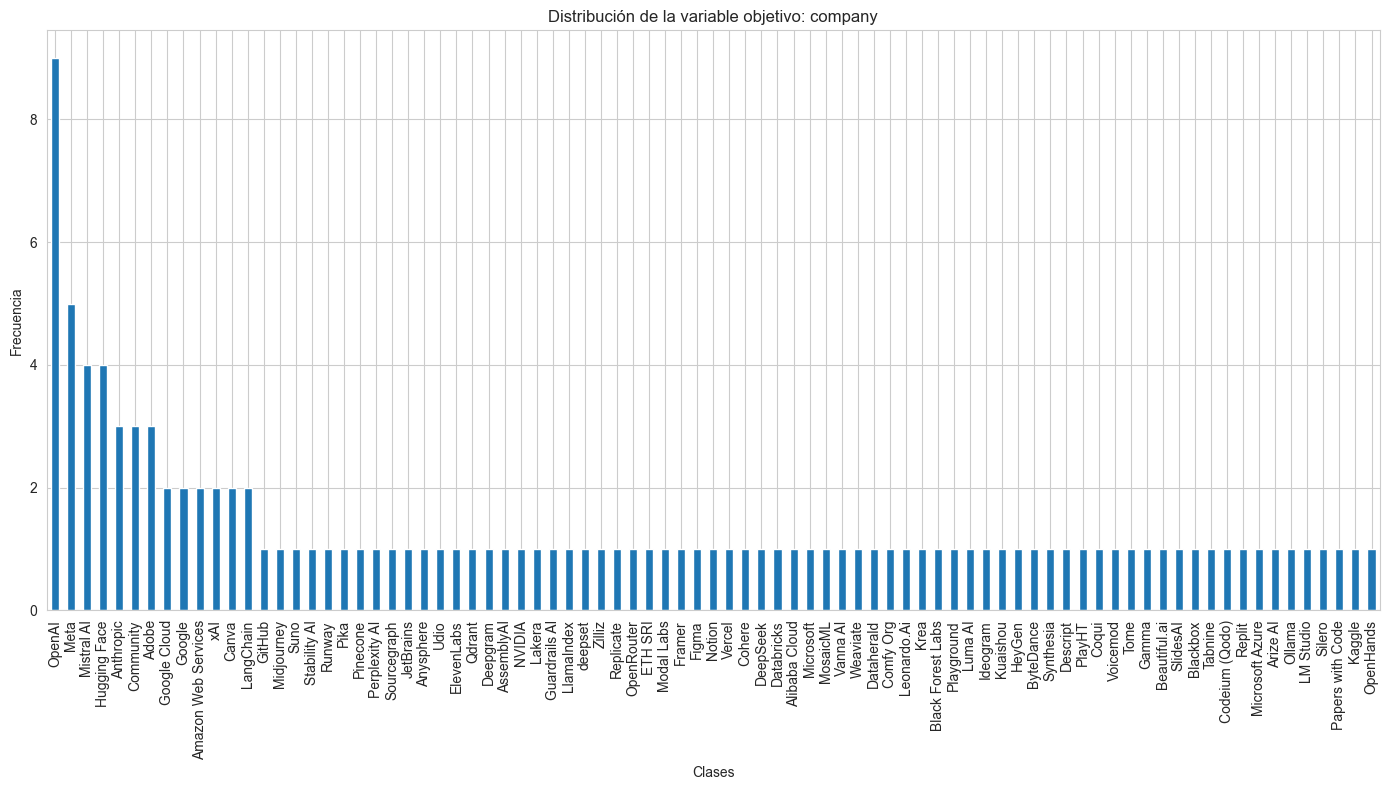

⚠️ Desbalance: usa 'stratify' en el split; reporta F1/AUC; evalúa 'class_weight' o re-muestreo.
[OK] Decisión de métrica guardada en: outputs/resumen/decision_metricas.txt
⚠️ Limitando a 12 histogramas (de 15 columnas numéricas)


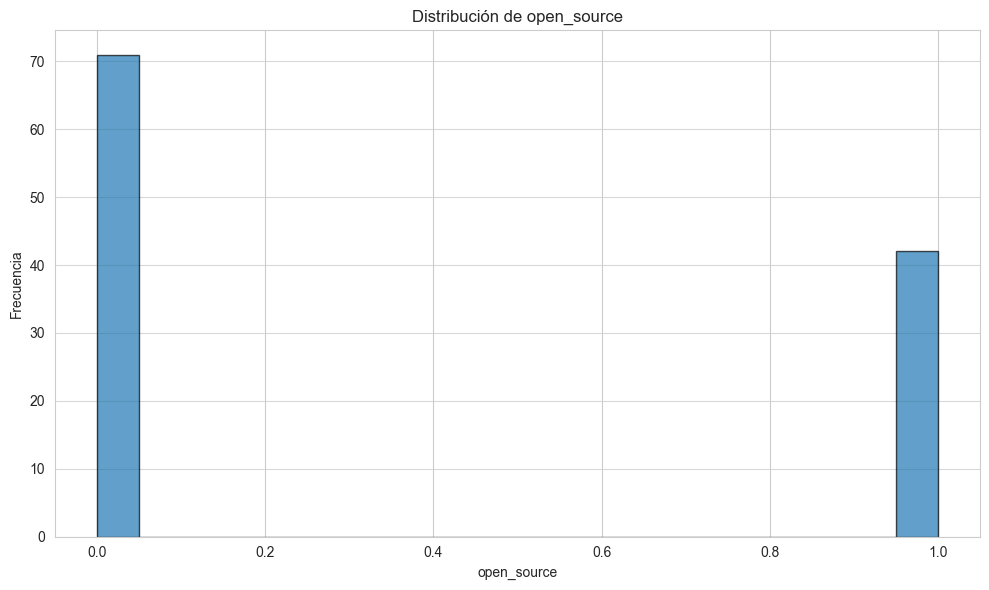

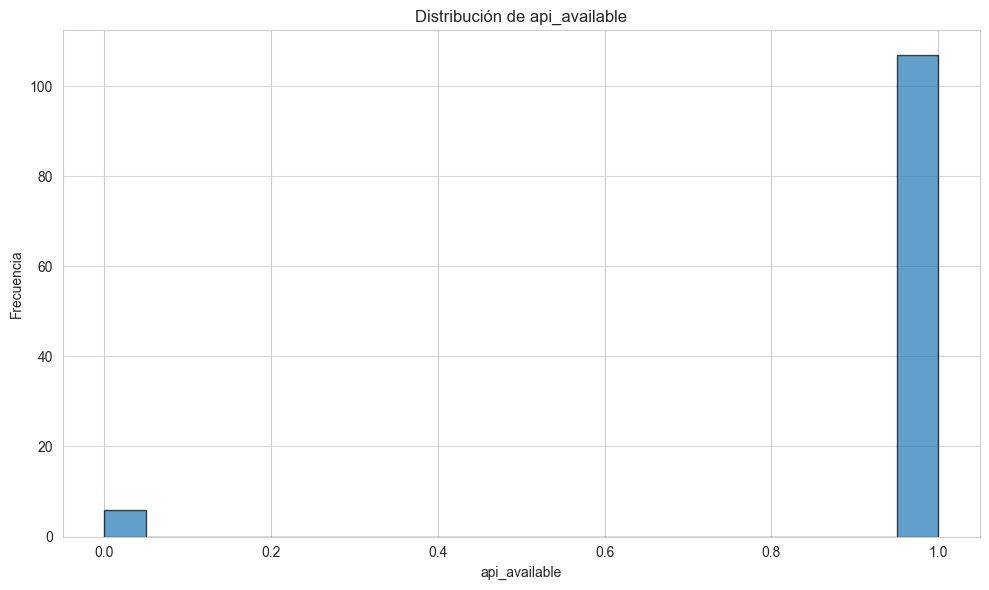

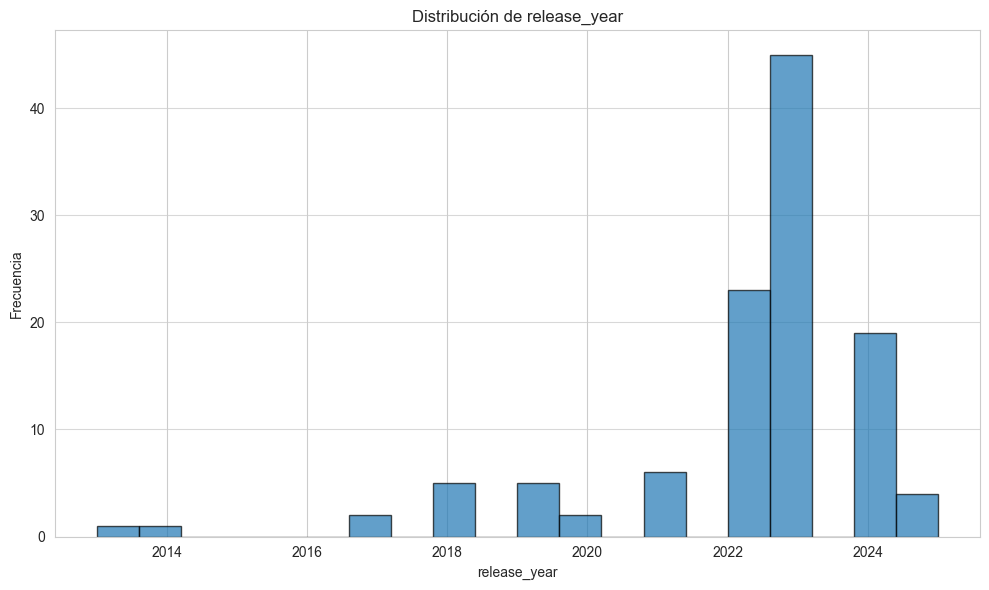

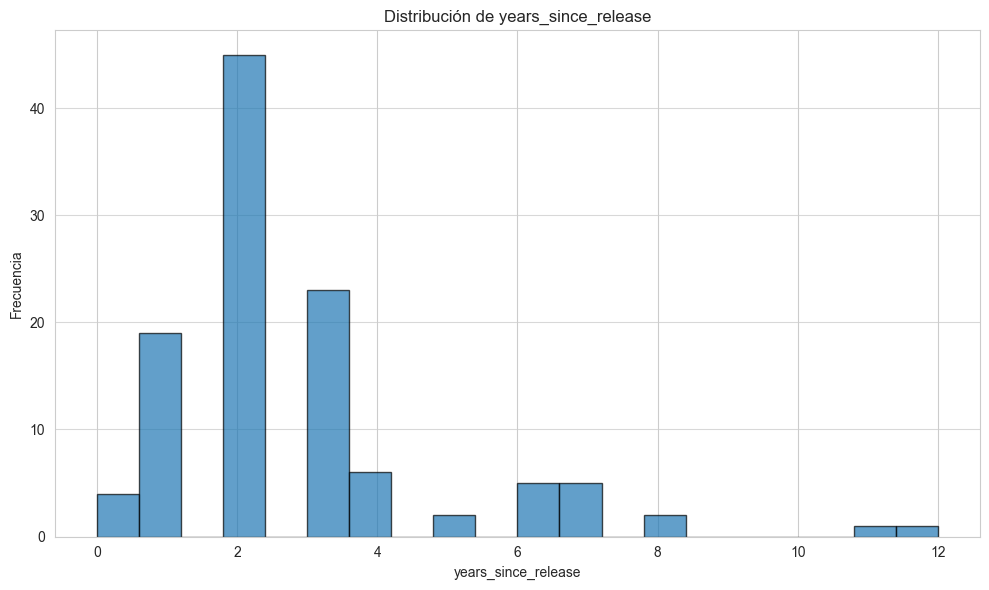

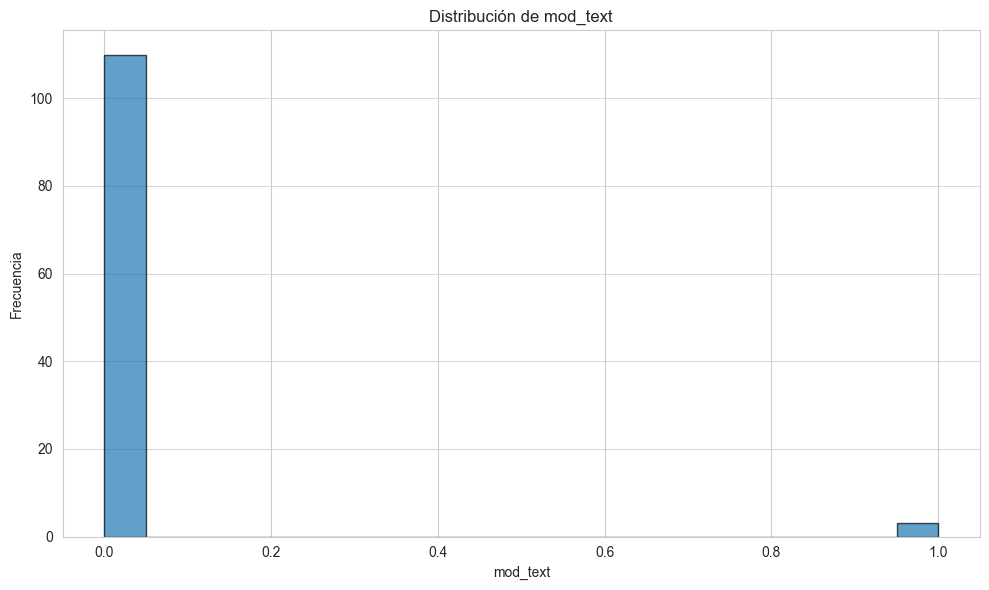

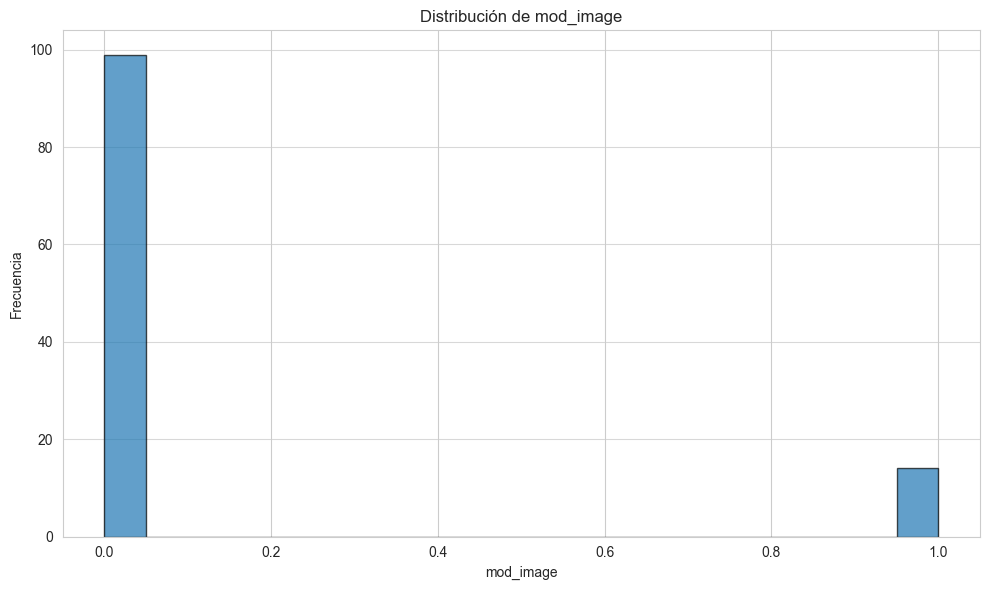

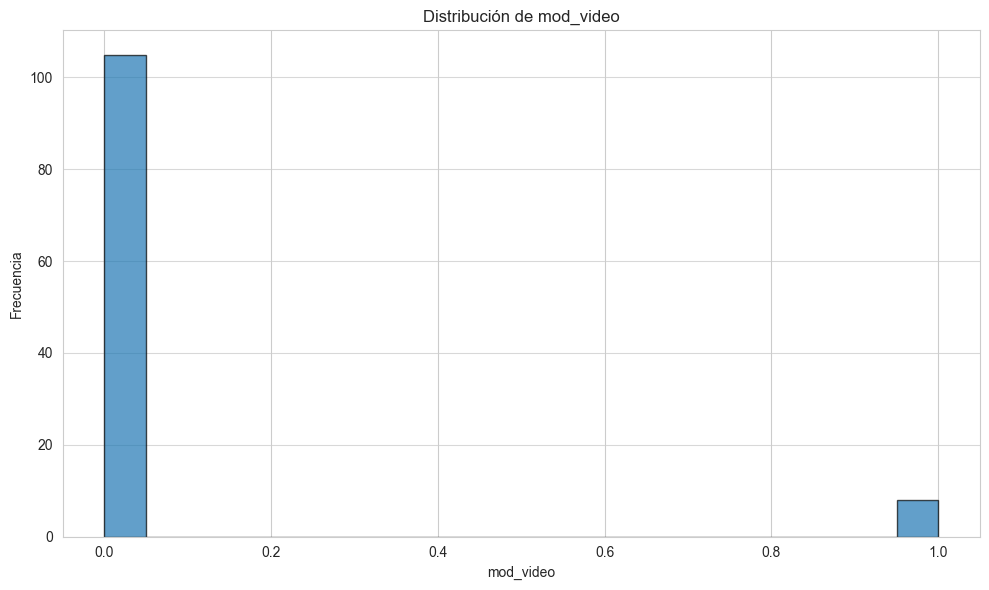

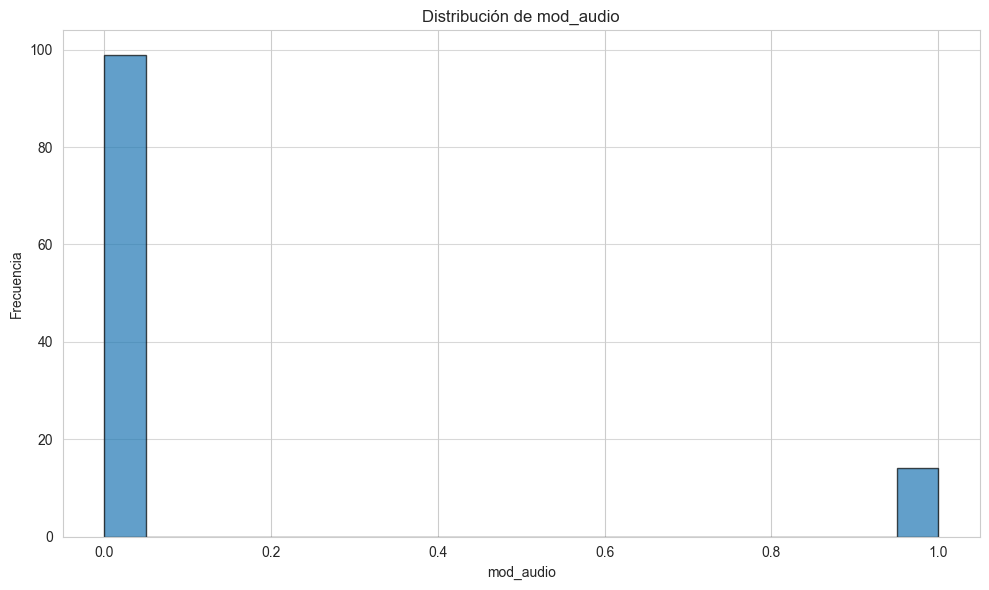

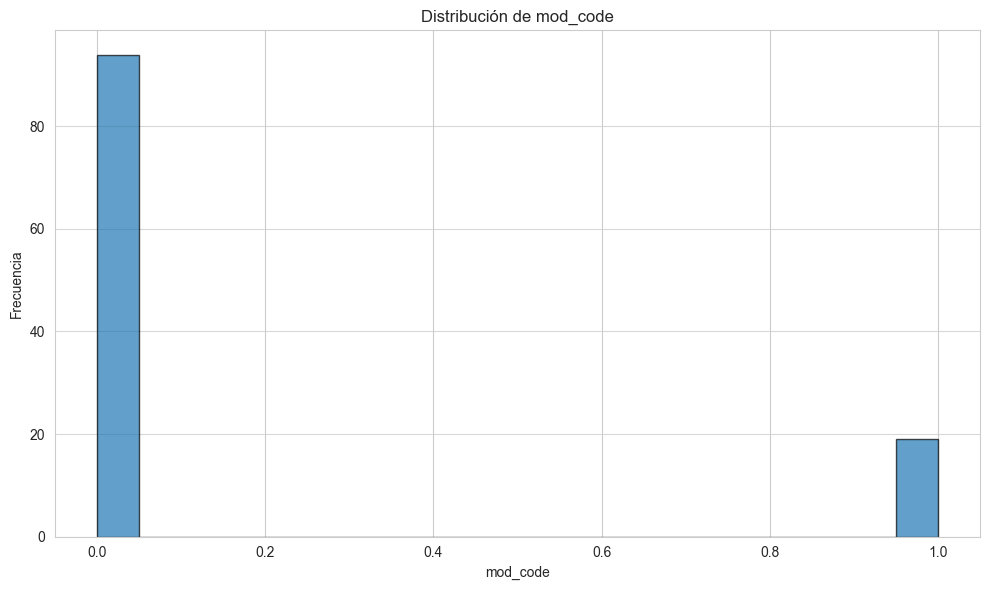

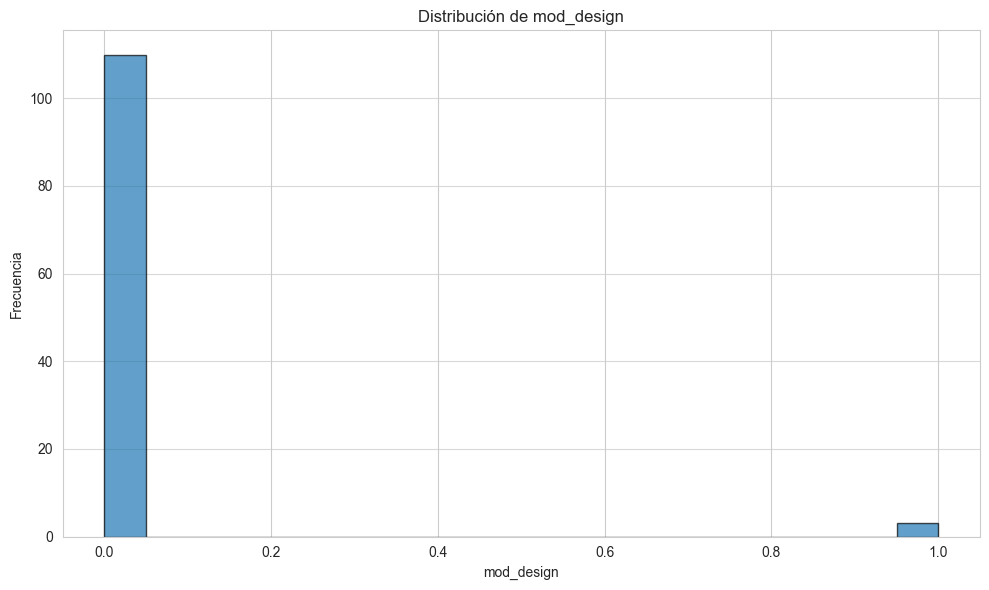

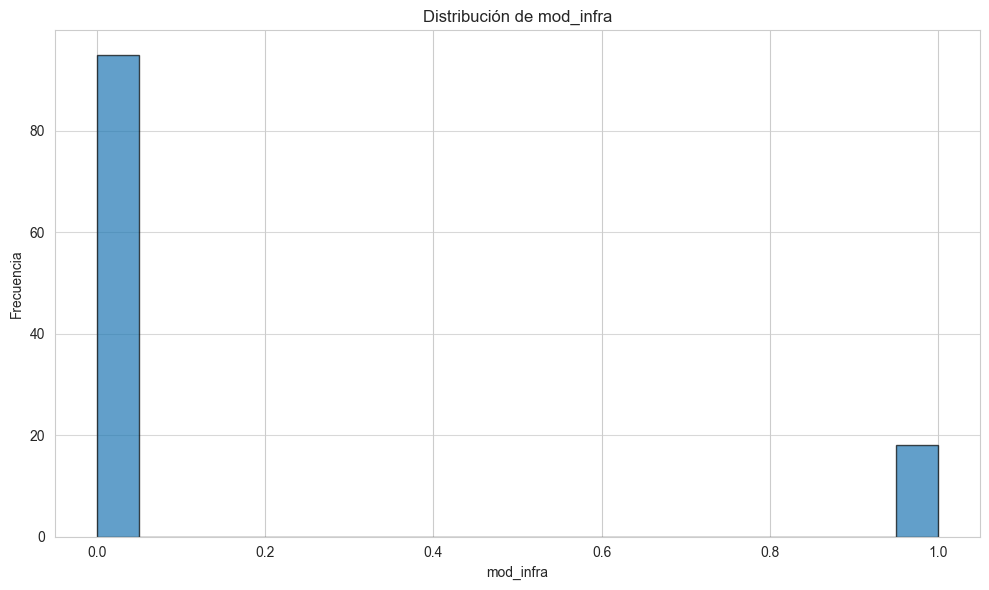

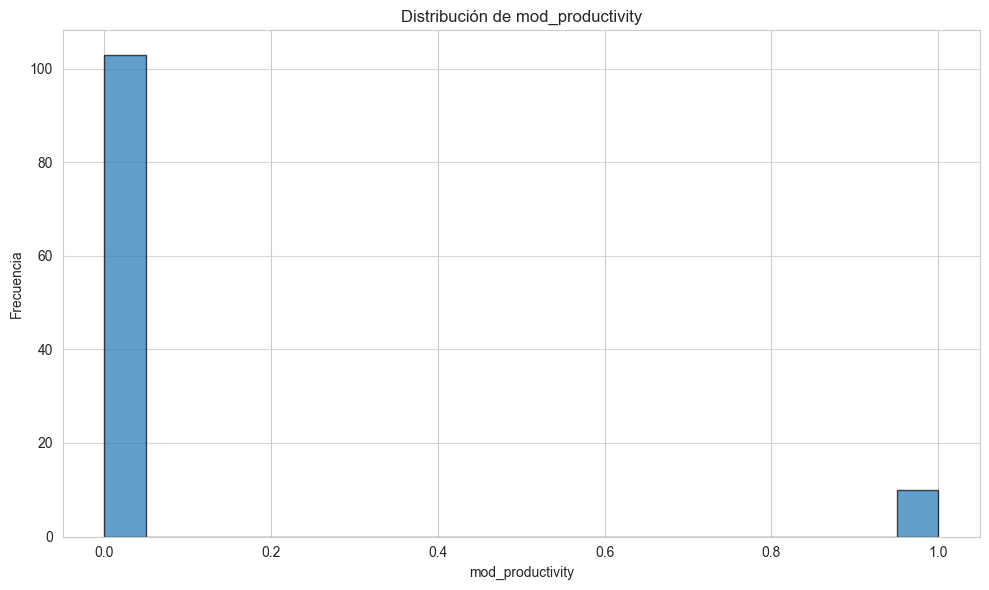

[OK] 12 histogramas guardados en outputs/figures/
⚠️ Limitando a 12 boxplots (de 15 columnas numéricas)


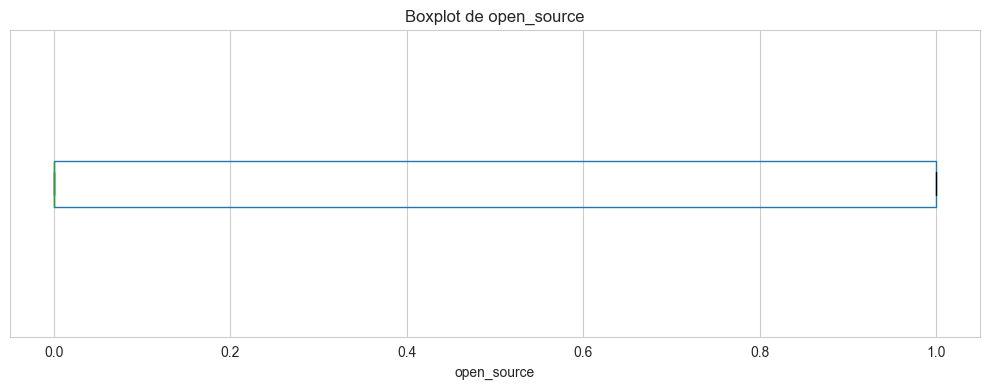

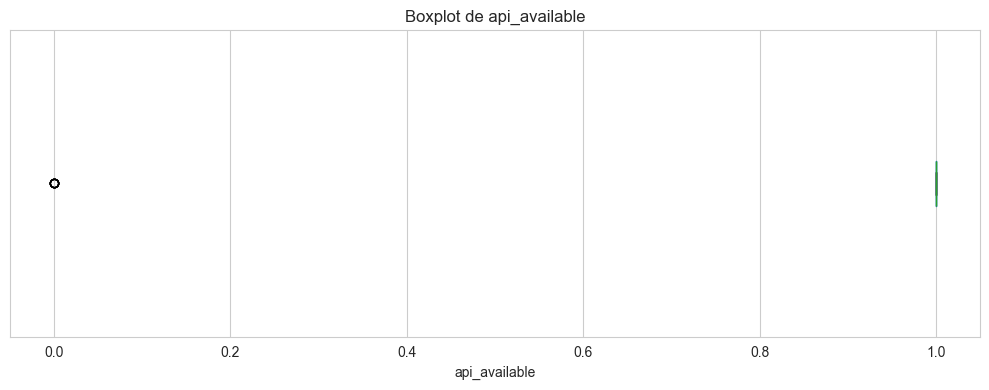

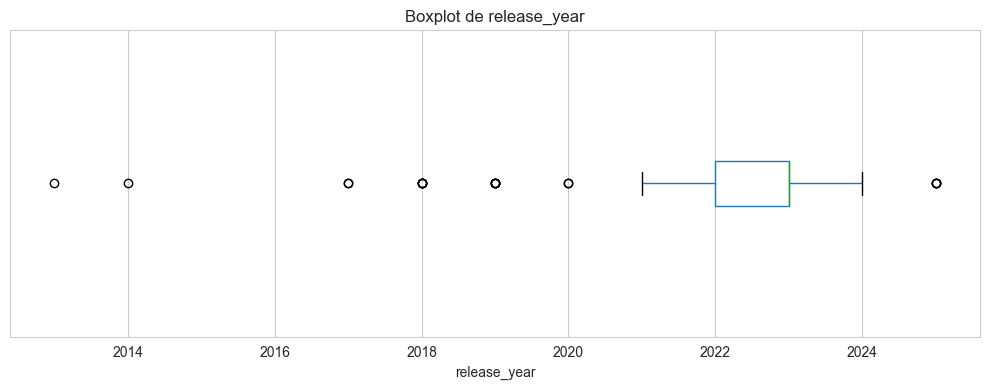

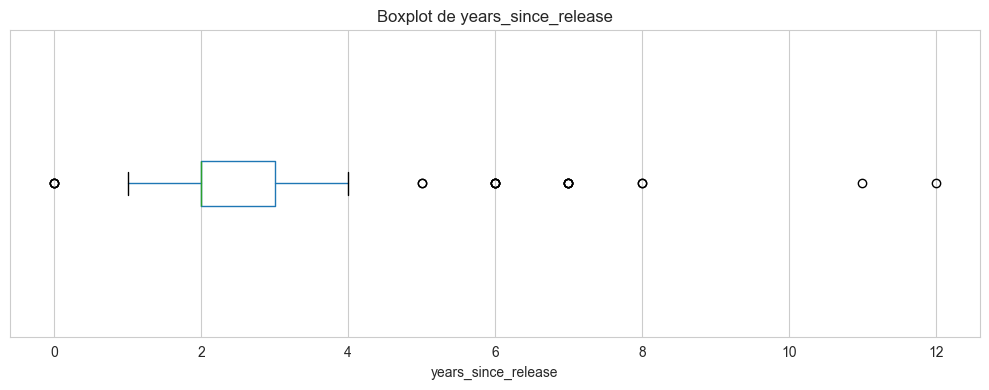

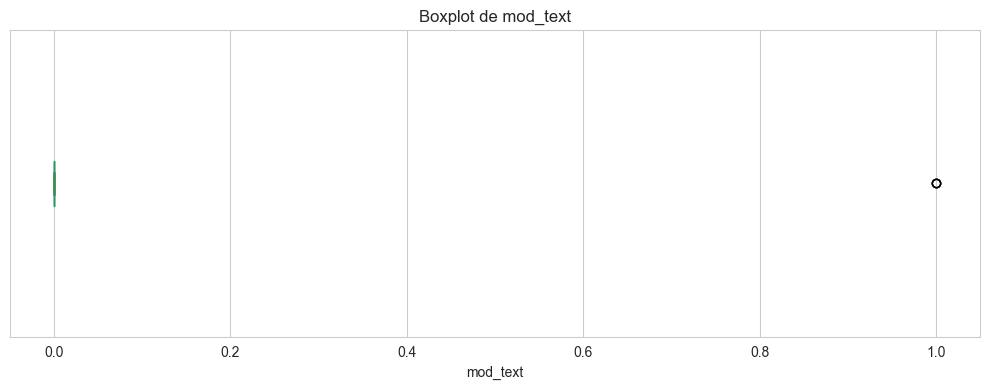

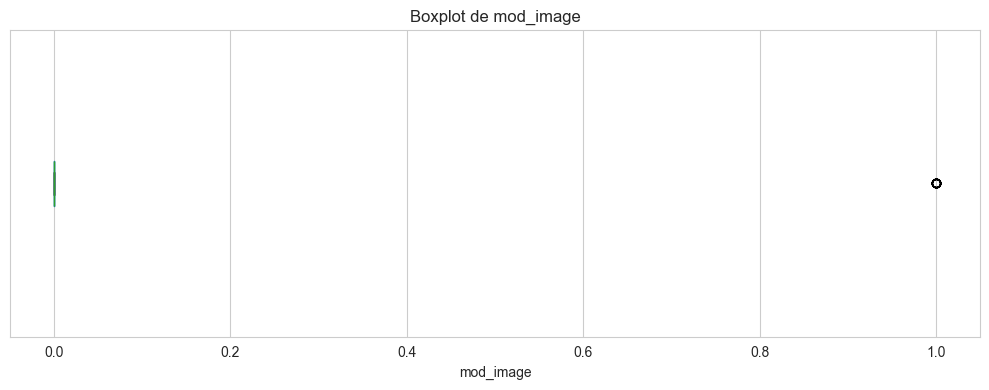

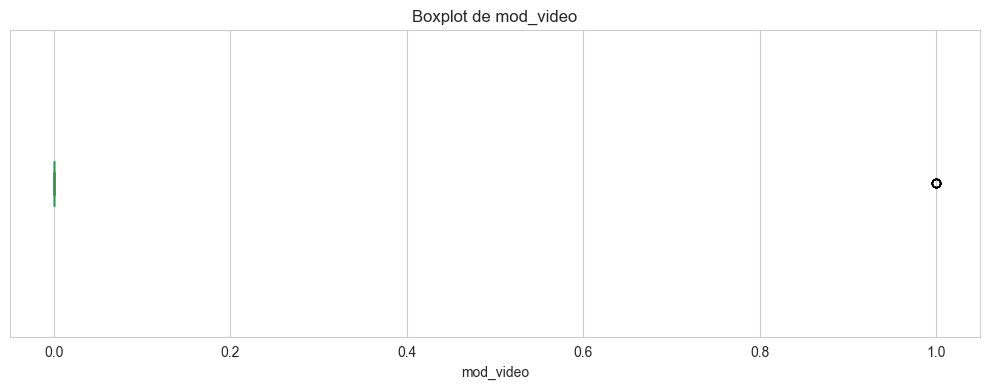

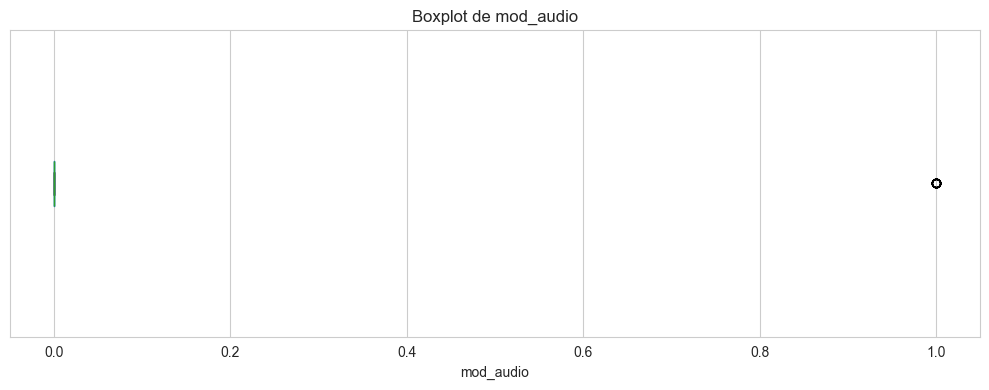

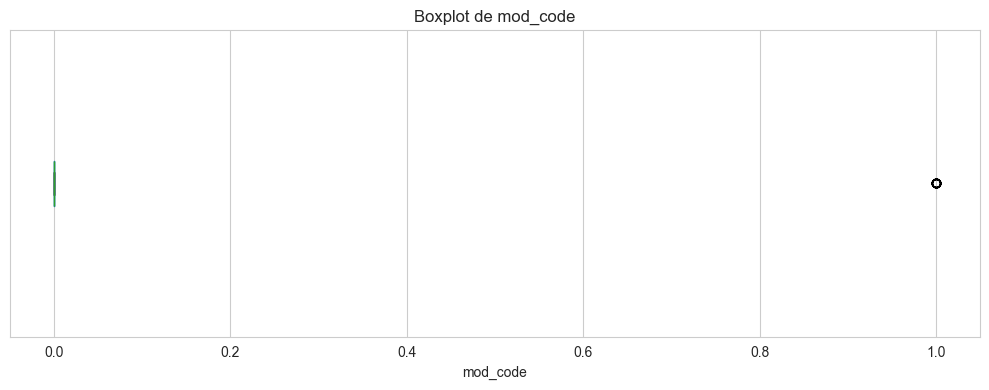

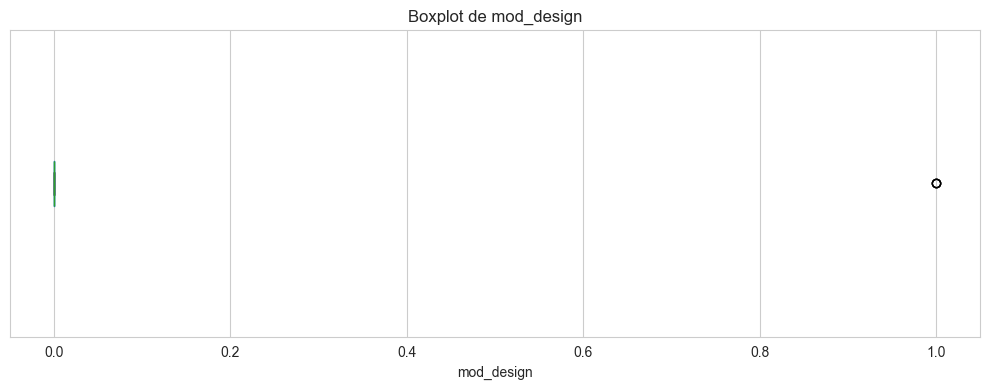

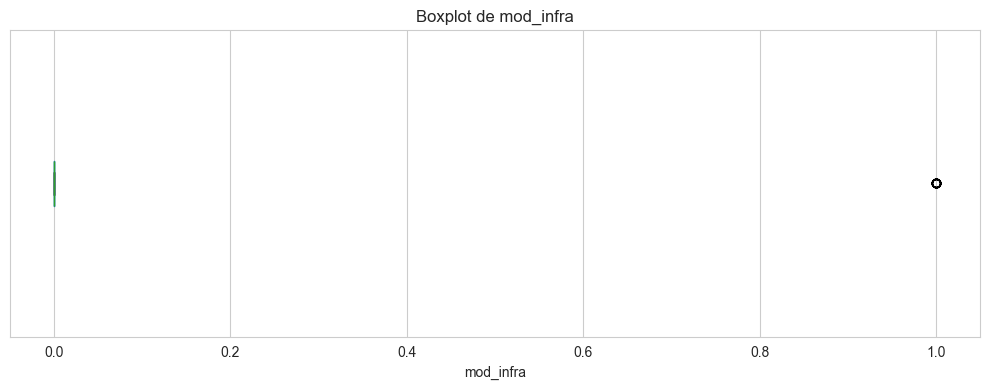

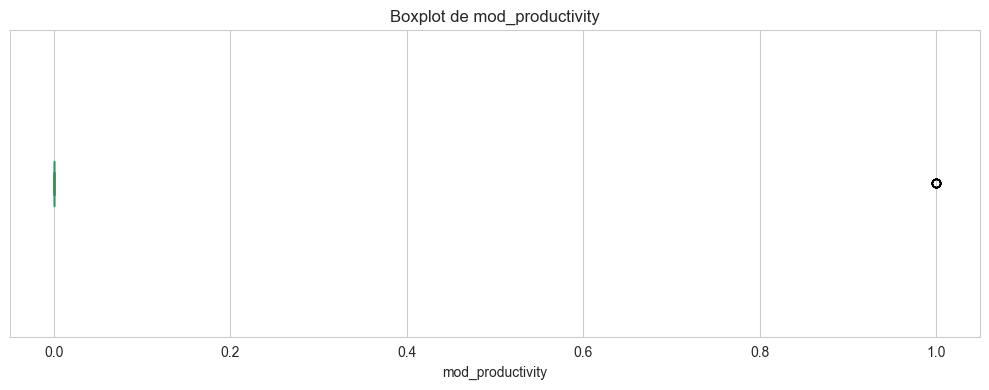

[OK] 12 boxplots guardados en outputs/figures/

=== EDA mínimo completado ===
- Archivos de resumen: 5
- Archivos de categorías: 5
- Gráficos generados: 25

=== EDA completo finalizado ===

Resultados disponibles:
- resumen: 5 archivos
- categorias: 5 archivos
- graficos: 25 archivos


In [25]:
# Vamos a crear un wrapper para eda_minimo que use rutas relativas al notebook
def eda_minimo_notebook(df, objetivo=None, max_cats=10, no_show=True, no_histos=False, no_box=False):
    """Wrapper para eda_minimo que maneja rutas relativas al notebook"""
    # Como estamos en el directorio notebooks/, necesitamos cambiar temporalmente
    # al directorio raíz para que las rutas funcionen correctamente
    cwd = os.getcwd()
    try:
        # Navegar al directorio padre (raíz del proyecto)
        os.chdir('..')
        # Ejecutar el EDA original
        resultados = eda_minimo(
            df,
            objetivo=objetivo,
            max_cats=max_cats,
            no_show=no_show,
            no_histos=no_histos,
            no_box=no_box,
        )
        return resultados
    finally:
        # Asegurarnos de volver al directorio original sin importar lo que suceda
        os.chdir(cwd)

# Ejecutamos el EDA completo en un solo paso
# Esta función combina todas las anteriores y genera un reporte completo
print("\n=== Ejecutando EDA completo ===\n")
resultados = eda_minimo_notebook(
    df,
    objetivo=variable_objetivo,
    max_cats=10,
    no_show=False,  # Mostrar gráficos
    no_histos=False,  # Generar histogramas
    no_box=False,    # Generar boxplots
)

print("\n=== EDA completo finalizado ===\n")
print("Resultados disponibles:")
for key, valores in resultados.items():
    print(f"- {key}: {len(valores)} archivos")

## Conclusiones

Hemos realizado un análisis exploratorio completo de los datos utilizando los módulos desarrollados en el proyecto EDA. Este análisis nos ha permitido:

1. Identificar la calidad de los datos y posibles problemas como valores faltantes
2. Entender las estadísticas descriptivas de las variables numéricas
3. Visualizar la distribución de variables categóricas y numéricas
4. Analizar la distribución de la variable objetivo y su posible desbalance
5. Ejecutar un EDA completo con todos los pasos integrados

Los resultados y visualizaciones han sido guardados en la carpeta `outputs/` para su posterior análisis y referencia.